In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mso
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)


In [132]:
df = pd.read_excel("D:\Python\Data Set\Aspiring\\aspiring_minds_employability_outcomes_2015.xlsx")

In [133]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [134]:
df.shape

(3998, 39)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

We can see our df consists of  
27 Numerical columns  
9 catogorical columns  
2 datetime  

In [136]:
np.round(df.describe())

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,663795.0,307700.0,78.0,2008.0,74.0,5157.0,2.0,71.0,5157.0,0.0,2012.0,502.0,502.0,513.0,1.0,353.0,95.0,91.0,23.0,16.0,32.0,3.0,-0.0,0.0,0.0,-0.0,-0.0
std,363218.0,212737.0,10.0,2.0,11.0,4802.0,0.0,8.0,4802.0,0.0,32.0,105.0,87.0,122.0,0.0,205.0,158.0,175.0,98.0,88.0,105.0,37.0,1.0,1.0,1.0,1.0,1.0
min,11244.0,35000.0,43.0,1995.0,40.0,2.0,1.0,6.0,2.0,0.0,0.0,180.0,195.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,-6.0,-5.0,-3.0,-7.0
25%,334284.0,180000.0,72.0,2007.0,66.0,494.0,2.0,66.0,494.0,0.0,2012.0,425.0,445.0,430.0,0.0,295.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0
50%,639600.0,300000.0,79.0,2008.0,74.0,3879.0,2.0,72.0,3879.0,0.0,2013.0,500.0,505.0,515.0,1.0,415.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-0.0,-0.0
75%,990480.0,370000.0,86.0,2009.0,83.0,8818.0,2.0,76.0,8818.0,1.0,2014.0,570.0,565.0,595.0,1.0,495.0,233.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
max,1298275.0,4000000.0,98.0,2013.0,99.0,18409.0,2.0,100.0,18409.0,1.0,2017.0,875.0,795.0,900.0,1.0,840.0,612.0,715.0,623.0,676.0,548.0,516.0,2.0,2.0,3.0,3.0,2.0


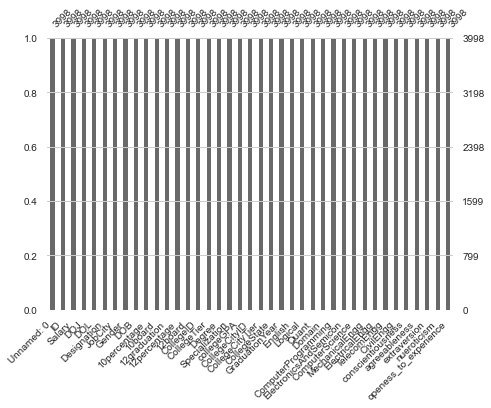

In [137]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(df, ax = ax_train, fontsize = 10);

* There are no null value as such but we might have look every column carefully

<AxesSubplot:>

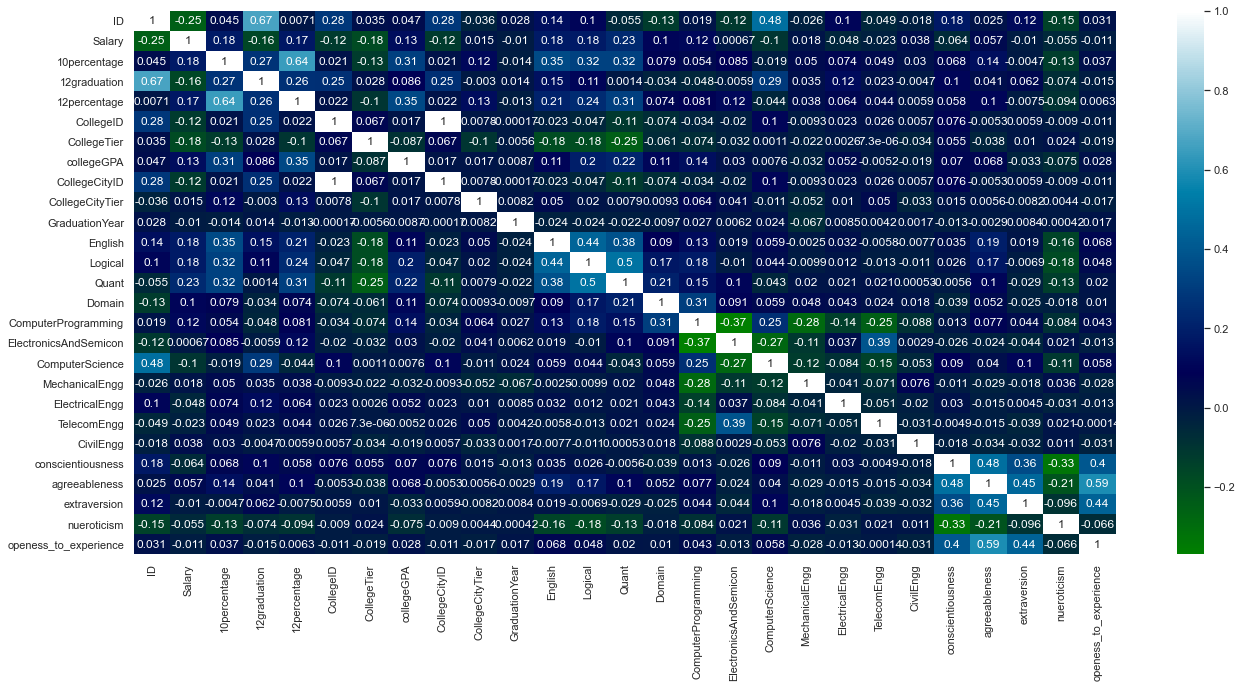

In [138]:
plt.figure(figsize = (22,10))
sns.heatmap(df.corr(), annot = True, cmap = "ocean")

## Data Cleaning

### Let"s analyse column by column


#### Salary

In [139]:
df["Salary"].unique()

array([ 420000,  500000,  325000, 1100000,  200000,  300000,  400000,
        600000,  230000,  450000,  270000,  350000,  250000,  120000,
        320000,  190000,  180000,  335000,  435000,  345000,  145000,
        220000,  530000,  340000,  360000,  215000,   80000,  330000,
        380000,  110000,  205000,   95000,  390000,   60000,  240000,
        525000,  305000,  150000,  310000,  455000,  800000,  100000,
        280000,  445000,  315000,  370000,  275000, 1500000,  425000,
        470000,  460000,  510000,  480000,  170000,  640000,  225000,
        440000, 1200000,  675000,  105000,  195000,  385000,  235000,
        615000,  290000,  140000,  405000, 1860000,  375000,  430000,
        660000,   70000,  410000,  550000,   35000,  115000,  415000,
        265000,  285000,  245000,  395000,  560000,  700000,  185000,
        160000,  625000,   85000,  135000,  785000,  210000,  155000,
        355000,  535000,  690000,  260000, 1110000, 1000000,  505000,
        475000,  715

In [140]:
# Salary less than 50000 people might have entered their montly income rather than yearly
df.loc[df["Salary"] <= 50000,"Salary"]*= 12
lst = ["ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg"]
for i in lst:
    df[i].replace(-1,0,inplace = True)

#### DOJ, DOL, DOB

In [141]:
df["DOJ"].unique()

array(['2012-06-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2014-06-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2013-10-01T00:00:00.000000000', '2012-09-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2014-10-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2011-06-01

In [142]:
df["DOL"].unique()

array(['present', datetime.datetime(2015, 3, 1, 0, 0),
       datetime.datetime(2015, 5, 1, 0, 0),
       datetime.datetime(2015, 7, 1, 0, 0),
       datetime.datetime(2015, 4, 1, 0, 0),
       datetime.datetime(2014, 10, 1, 0, 0),
       datetime.datetime(2014, 9, 1, 0, 0),
       datetime.datetime(2014, 6, 1, 0, 0),
       datetime.datetime(2012, 9, 1, 0, 0),
       datetime.datetime(2013, 12, 1, 0, 0),
       datetime.datetime(2015, 6, 1, 0, 0),
       datetime.datetime(2013, 10, 1, 0, 0),
       datetime.datetime(2015, 1, 1, 0, 0),
       datetime.datetime(2014, 4, 1, 0, 0),
       datetime.datetime(2013, 6, 1, 0, 0),
       datetime.datetime(2012, 3, 1, 0, 0),
       datetime.datetime(2014, 7, 1, 0, 0),
       datetime.datetime(2013, 2, 1, 0, 0),
       datetime.datetime(2014, 1, 1, 0, 0),
       datetime.datetime(2013, 4, 1, 0, 0),
       datetime.datetime(2012, 7, 1, 0, 0),
       datetime.datetime(2014, 5, 1, 0, 0),
       datetime.datetime(2013, 9, 1, 0, 0),
       datetime.da

In [143]:
df["DOB"].unique()

array(['1990-02-19T00:00:00.000000000', '1989-10-04T00:00:00.000000000',
       '1992-08-03T00:00:00.000000000', ...,
       '1986-02-28T00:00:00.000000000', '1990-06-22T00:00:00.000000000',
       '1987-04-15T00:00:00.000000000'], dtype='datetime64[ns]')

* We can see the DOJ,DOL,DOB are given in timestamp format.
* we will conver them to date using datetime module.  
* we will convert "Present" in "DOL" column to Present date for our analysis  

In [144]:
import datetime as dt
df = df.iloc[:,1:]
df["DOJ"] = pd.to_datetime(df["DOJ"]).dt.date
df["DOL"].replace("present",dt.datetime.today(),inplace = True)
df["DOL"] = pd.to_datetime(df["DOL"]).dt.date
# We will engineer this feature from DOJ and DOL as we are only concerned with how 
# many years the person has worked in the organisation.
df["Period"] = pd.to_datetime(df["DOL"]).dt.year - pd.to_datetime(df["DOJ"]).dt.year

# We only need DOB year,so we will convert DOB column from timestamp to year
df["DOB"] = pd.to_datetime(df["DOB"]).dt.year
df.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
0,203097,420000,2012-06-01,2022-09-23,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,10
1,579905,500000,2013-09-01,2022-09-23,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,9
2,810601,325000,2014-06-01,2022-09-23,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,8
3,267447,1100000,2011-07-01,2022-09-23,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,11
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


#### 

#### Observations of the columns(regarding cleaning and missing values):
 

 * Domain column contain -1 which is a missing value
 * There is an unnamed column and we cannot use this for data analysis.So we   drop that column

#### Designation

In [145]:
df["Designation"].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

* Designation Column has "get" value which is a not a desired value.We should clean this and can be imputed with mode of the column.

In [146]:
df[df["Designation"] == "get"][["Designation","Specialization"]]

,Designation,Specialization
4,get,electronics and communication engineering
332,get,mechanical and automation
350,get,electrical engineering
1717,get,mechanical engineering
1897,get,mechanical engineering
2140,get,mechanical engineering
2318,get,electronics and electrical engineering
2443,get,mechanical engineering
2666,get,electronics and electrical engineering
2757,get,mechanical engineering


* 71% are from Mechanical Department
* 29% are from ECE Department

In [147]:
Mechanical = df[df["Specialization"].isin(["mechanical engineering","mechanical and automation"])]["Designation"].mode()[0]
Eelectrical = df[df["Specialization"] == ("electronics and electrical engineering")]["Designation"].mode()[0]
print(f"mode for mechanical:  {Mechanical}\nmode for EEE:  {Eelectrical}")

mode for mechanical:  production engineer
mode for EEE:  system engineer


In [148]:
# Now we can impute the "get" of designation with modes of the respective domains.
df.loc[df["Specialization"].isin(["mechanical engineering","mechanical and automation"]),"Designation"].replace("get", Mechanical, inplace = True)
df["Designation"].replace("get", Eelectrical, inplace = True)

#### Jobcity

In [149]:
df["JobCity"].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

* Job city column contains -1 values which are NaN equivalents.
* we will impute them before moving forward.
* And also we don"t want our data to be case sensetive.So , we"ll treat it also.
* Lastly there is some redundency like "Bangalore"~"Bangluru".So we"ll treat that as well. 

In [150]:
# We will remove case sensitivity in jobcity because it will effect our analysis.So let us replace "-1" with some string and then apply title method to it.
df["JobCity"].replace(-1, "NULL", inplace = True)
df["JobCity"].apply(lambda x:x.title())
df[df["JobCity"] == "NULL"].head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
15,536517,350000,2013-08-01,2022-09-23,network engineer,NULL,f,1990,69.54,icse,2008,64.43,isc,4501,2,B.Tech/B.E.,information technology,63.00,4501,0,Uttar Pradesh,2012,485,520,355,0.308401,355,0,0,0,0,0,0,1.7465,1.9048,0.6720,-0.29020,1.2528,9
21,339689,200000,2012-08-01,2013-12-01,software engineer,NULL,f,1991,75.67,up,2007,74.40,up,11368,2,B.Tech/B.E.,information technology,74.01,11368,0,Uttar Pradesh,2012,385,555,445,0.635979,445,0,0,0,0,0,0,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,1
39,533417,200000,2013-01-01,2013-06-01,management trainee,NULL,m,1991,88.00,kerala state technical education,2008,89.66,kerala state hse board,867,2,B.Tech/B.E.,electronics and communication engineering,76.40,867,0,Kerala,2012,510,640,635,0.124502,0,233,0,0,0,0,0,0.3941,1.2808,0.2366,-2.19980,-0.4455,0
77,754392,120000,2014-07-01,2022-09-23,test engineer,NULL,m,1992,76.00,state board,2009,72.00,state board,8888,2,B.Tech/B.E.,computer science & engineering,63.20,8888,0,Tamil Nadu,2013,510,355,340,0.123017,285,0,0,0,0,0,0,-0.1590,-0.2871,0.4711,0.27270,-0.4776,8
79,1089852,100000,2013-08-01,2014-05-01,software developer,NULL,f,1992,86.00,state board,2009,95.00,state board,4726,2,B.Tech/B.E.,electronics and communication engineering,78.60,4726,0,Telangana,2013,405,545,450,0.649390,375,356,0,0,0,0,0,0.5591,-0.4536,0.0100,-0.48790,0.6721,1


In [151]:
# Cleaning the column which have similar meaning but has spelling difference.
df["JobCity"].replace("Bangalore","Bengaluru",inplace = True)
df["JobCity"].replace("Banaglore","Bengaluru",inplace = True)
df["JobCity"].replace("Chennai, Bangalore","Bengaluru",inplace = True)
df["JobCity"].replace(" Bangalore","Bengaluru",inplace = True)
df["JobCity"].replace("Bangalore ","Bengaluru",inplace = True)
df["JobCity"].replace("Banglore","Bengaluru",inplace = True)
df["JobCity"].replace("Jaipur ","Jaipur",inplace = True)
df["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace = True)
df["JobCity"].replace("Bangalore ","Bengaluru",inplace = True)
df["JobCity"].replace("Jaipur ","Jaipur",inplace = True)
df["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace = True)
df["JobCity"].replace("Hyderabad ","Hyderabad",inplace = True)
df["JobCity"].replace("Hyderabad(Bhadurpally)","Hyderabad",inplace = True)
df["JobCity"].replace("Bhubaneswar ","Bhubaneswar",inplace = True)
df["JobCity"].replace("Delhi/Ncr","Delhi",inplace = True)
df["JobCity"].replace("Nagpur ","Nagpur",inplace = True)
df["JobCity"].replace("Pune ","Pune",inplace = True)
df["JobCity"].replace("Trivandrum ","Trivandrum",inplace = True)
df["JobCity"].replace("Thiruvananthapuram","Trivandrum",inplace = True)

In [152]:
df[df["JobCity"] == "NULL"][["Designation","JobCity","Gender","10percentage","10board","12percentage","12board","Degree","Specialization","CollegeState","Specialization"]].mode()

,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,Degree,Specialization,CollegeState,Specialization
0,software engineer,NULL,m,76.0,cbse,64.0,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh,electronics and communication engineering
1,NaN,NaN,NaN,78.0,NaN,66.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# First,we saw the frequent(mode) values in other columns when we have a missing value in our target column("Jobcity")
# Now,we will find list of modes of other columns when they have the above found frequent value in their respective column.
# In this way,we are able to include the presence of all columns in predicting our best shot for the missing value.

best_fit = []
best_fit.append(df[df["Designation"] == "software engineer"]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["Gender"] == "m"]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["10percentage"] == 76]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["10board"] == "cbse"]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["12percentage"] == 64]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["12board"] == "cbse"]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["collegeGPA"] == 70]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["Salary"] == 200000]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["Degree"].str.startswith("B.Tech/")]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["Specialization"].str.startswith("electronics and communication eng")]["JobCity"].mode().to_list()[0])
best_fit.append(df[df["CollegeState"].str.startswith("Uttar Pradesh")]["JobCity"].mode().to_list()[0])
best_fit

['Bengaluru',
 'Bengaluru',
 'NULL',
 'Noida',
 'NULL',
 'Noida',
 'Bengaluru',
 'NULL',
 'Bengaluru',
 'Bengaluru',
 'Noida']

In [154]:
# We can see mode from the best_mode list is "Bangalore".
df["JobCity"].replace("NULL", "Bengaluru", inplace = True)

In [155]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Period'],
      dtype='object')

####  10board

In [156]:
df["10board"].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

* This column has missing values in the form of "0".
* Let us handle these using same proceedure(mode).

In [157]:
value_1 = []
value_1.append(df[df["Designation"] == "software engineer"]["10board"].mode().to_list()[0])
value_1.append(df[df["Gender"] == "m"]["10board"].mode().to_list()[0])
value_1.append(df[df["10percentage"] == 75]["10board"].mode().to_list()[0])
value_1.append(df[df["JobCity"] == "Bengaluru"]["10board"].mode().to_list()[0])
value_1.append(df[df["12percentage"] == 65]["10board"].mode().to_list()[0])
value_1.append(df[df["collegeGPA"] == 65]["10board"].mode().to_list()[0])
value_1.append(df[df["Salary"] == 400000]["10board"].mode().to_list()[0])
value_1.append(df[df["Degree"].str.startswith("B.Tech/")]["10board"].mode().to_list()[0])
value_1.append(df[df["Specialization"].str.startswith("computer eng")]["10board"].mode().to_list()[0])
value_1.append(df[df["CollegeState"].str.startswith("Tamil Nadu")]["10board"].mode().to_list()[0])
value_1

['cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'state board']

* Clearly "CBSE" is the way ahead.

In [160]:
df["10board"].replace(0,"cbse",inplace = True)

* We can replace the redundant values of the 12board column in three category "state","cbse","icse".

In [161]:
state_board_list = ["board ofsecondary education,ap",
       "karnataka secondary school of examination",
       "karnataka state education examination board",
       "kerala state technical education",
       "state board of secondary education, andhra pradesh",
       "gujarat state board", "wbbse", "icse board",
       "board of secondary education(bse) orissa",
       "little jacky matric higher secondary school", "bsc,orissa",
       "matriculation board", "j & k bord",
       "haryana board of school education,(hbse)", "metric", "kseeb",
       "maticulation", "karnataka secondory education board",
       "mumbai board", "sslc", "kseb", "board secondary  education",
       "west bengal board of secondary education",
       "jharkhand secondary examination board,ranchi", "bseb,patna",
       "bse", "sss pune", "karnataka education board (keeb)",
       "state board of secondary education( ssc)",
       "don bosco maatriculation school",
       "karnataka state secondary education board",
       "certificate of middle years program of ib",
       "karnataka board of secondary education",
       "board of secendary education orissa",
       "karantaka secondary education and examination borad",
       "kseeb(karnataka secondary education examination board)",
       "cbse[gulf zone]", "state(karnataka board)",
       "jharkhand secondary examination board (ranchi)",
       "karnataka secondary education examination board", "delhi board",
       "mirza ahmed ali baig", "jseb", "bse, odisha",
       "tamilnadu matriculation board", "jharkhand secondary board",
       "board of secondary education,andhara pradesh",
       "state board of secondary education,andhra pradesh",
       "stjosephs girls higher sec school,dindigul",
       "education board of kerala", "board of ssc",
       "maharashtra state board pune", "secondary school cerfificate",
       "maharashtra sate board", "ksseb",
       "bihar examination board, patna", "state borad hp", "cluny",
       "bsepatna", "up borad", "ssc board of andrapradesh", "matric",
       "bse,orissa", "ssc-andhra pradesh", "mhsbse",
       "karnataka sslc board bangalore", "karnataka",
       "secondary school of education", "karnataka secondary board",
       "andhra pradesh board ssc", "hse,orissa", "national public school",
       "board of secondary education, andhra pradesh",
       "board of secondary education orissa",
       "board of secondary education,ap",
       "board of secondary education,andhra pradesh",
       "jawahar navodaya vidyalaya", "aisse",
       "karnataka board of higher education",
       "bharathi matriculation school", "wbbsce", "mp state board",
       "seba(assam)", "anglo indian", "bse(board of secondary education)",
       "school secondary education, andhra pradesh",
       "secondary state certificate",
       "maharashtra state board of secondary and higher secondary education,pune",
       "stmary higher secondary", "secondary school certificate", "cbse ",
       "board of secondary education,orissa",
       "maharashtra state board,pune", "kiran english medium high school",
       "sarada high scchool",
       "kalaimagal matriculation higher secondary school",
       "maharastra board", "sslc board", "ssc maharashtra board",
       "bihar secondary education board,patna",
       "haryana board of school education",
       "ksseb(karnataka state board)",
       "jharkhand secondary education board",
       "state board of secondary education, ap", "hsce",
       "board of secondary education,odisha",
       "west bengal board of secondary examination (wbbse)", "apssc",
       "bseb patna", "biharboard", "pune", "gyan bharati school",
       "rbse,ajmer", "board of secondaray education",
       "secondary school education", "jbse,jharkhand",
       "bihar school examination board",
       "west bengal board of secondary eucation", "state boardmp board ",
       "icse board , new delhi",
       "board of secondary education (bse) orissa",
       "maharashtra state board for ssc",
       "board of secondary school education",
       "stmary's convent inter college", "ap state board", "ksbe",
       "sslc,karnataka", "board of school education haryana",
       "maharashtra state board of secondary and higher secondary education",
       "ssc regular", "west bengal  board of secondary education",
       "bseb ,patna",
       "state board - west bengal board of secondary education : wbbse",
       "delhi public school", "karnataka secondary eduction",
       "secondary education board of rajasthan", "apsche",
       "board of  secondary education",
       "board of secondary education - andhra pradesh",
       "ap state board for secondary education", "seba",
       "punjab school education board, mohali", "hse,board",
       "board of ssc education andhra pradesh", "bse,odisha", "state board", "mp board bhopal", "up",
       "ssc", "bseb", "matriculation", "karnataka state board",
       "maharashtra state board", "up board", "uttar pradesh board",
       "mp board", "upboard", "rbse",
       "central board of secondary education", "pseb", "jkbose",
       "ms board", "stateboard", "matric board",
       "board of secondary education", "u p board", "hsc", "kerala",
       "gsheb", "up(allahabad)", "nagpur", "maharashtra",
       "karnataka secondary education board",
       "himachal pradesh board of school education",
       "board of secondary education rajasthan", "uttarakhand board",
       "ua", "hbsc", "hbse", "jharkhand accademic council", "bihar board",
       "maharashtra state(latur board)", "rajasthan board", "mpboard",
       "upbhsie", "secondary board of rajasthan", "up baord",
       "board of intermediate education", "up board , allahabad",
       "maharashtra board", "board of school education harayana", "latur",
       "board of secondary education, rajasthan", "mp",
       "karnataka education board", "u p", "state board of karnataka",
       "stjoseph of cluny matrhrsecschool,neyveli,cuddalore district",
       "nagpur board", "jharkhand academic council", "bsemp",
       "board of secondary education,rajasthan(rbse)", "bihar","kerala state board", "tn state board",
       "kolhapur divisional board, maharashtra",
       "uttaranchal state board", "gseb", "uttar pradesh", "ghseb",
       "board of school education uttarakhand", "msbshse,pune",
       "tamilnadu state board", "kerala university",
       "uttaranchal shiksha avam pariksha parishad",
       "bright way college, (up board)", "andhra pradesh state board",
       "cgbse", "rajasthan board ajmer", "mpbse", "pune board", "up bord",
       "state board (jac, ranchi)", "gujarat board", "state board ",
       "karnataka board", "tamil nadu state", "uttrakhand board",
       "sri kannika parameswari highier secondary school, udumalpet",
       "nashik board", "himachal pradesh board",
       "maharashtra satate board",
       "maharashtra state board mumbai divisional board",
       "dav public school,hehal",
       "rajasthan board of secondary education",
       "karnataka secondary education", "maharashtra nasik board",
       "holy cross matriculation hr sec school", "cbsc", "kolhapur",
       "bseb, patna", "up board allahabad", "nagpur board,nagpur",
       "state bord", "hse", "madhya pradesh board", "latur board",
       "nagpur divisional board", "cgbse raipur", "uttranchal board",
       "bihar school examination board patna", "cbse board", "mp-bse",
       "up bourd", "dav public school sec 14",
       "council for indian school certificate examination",
       "aurangabad board", "j&k state board of school education",
       "maharashtra state boar of secondary and higher secondary education",
       "karnataka state examination board", "nasik", "up board,allahabad",
       "maharashtra state board of secondary & higher secondary education",
       "maharashtra board, pune", "rbse (state board)",
       "board of high school and intermediate education uttarpradesh",
       "kea", "jharkhand acedemic council", "up-board"]

In [162]:

for i in state_board_list:
    df["10board"].replace(i,"state",inplace=True)

replace_list_cbse = ["cbse", 
       "all india board", 
       "central board of secondary education, new delhi", "cbese"]
for i in replace_list_cbse:
    df["10board"].replace(i,"cbse",inplace=True)

replace_list_icse = [ "isc", "icse", "isc board", "isce", "cicse",
       "isc board , new delhi"]
for i in replace_list_icse:
    df["10board"].replace(i,"icse",inplace=True)

df["10board"].unique()

array(['state', 'cbse', 'icse'], dtype=object)

#### 12board

In [163]:
df["12board"].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta


* The column contain 0 value which is missing value.
* Let us handle these using same proceedure(mode).
*  From what we found from above, we can be sure that 10 board missing value can be replaced with "cbse" as most of the people do 10th also from the same board as they have done their 10th.
* But Let"s see any how.

In [164]:
value_2 = []
value_2.append(df[df["Designation"] == "software engineer"]["12board"].mode().to_list()[0])
value_2.append(df[df["Gender"] == "m"]["12board"].mode().to_list()[0])
value_2.append(df[df["10percentage"] == 75]["12board"].mode().to_list()[0])
value_2.append(df[df["JobCity"] == "Bengaluru"]["12board"].mode().to_list()[0])
value_2.append(df[df["12percentage"] == 65]["12board"].mode().to_list()[0])
value_2.append(df[df["collegeGPA"]==65]["12board"].mode().to_list()[0])
value_2.append(df[df["Salary"] == 400000]["12board"].mode().to_list()[0])
value_2.append(df[df["Degree"].str.startswith("B.Tech/")]["12board"].mode().to_list()[0])
value_2.append(df[df["Specialization"].str.startswith("computer eng")]["12board"].mode().to_list()[0])
value_2.append(df[df["CollegeState"].str.startswith("Tamil Nadu")]["12board"].mode().to_list()[0])
value_2

['cbse',
 'cbse',
 'cbse',
 'state board',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'state board']

In [165]:
df["12board"].replace(0,"cbse",inplace = True)

* We can replace the redundant values of the 12board column with "state","cbse","icse".

In [166]:
state_board_list = ["board of intermediate education,ap", "state board",
       "mp board",  "karnataka pre university board", "up",
       "p u board, karnataka", "dept of pre-university education", "bie",
       "kerala state hse board", "up board", "bseb", "chse", "puc",
       " upboard",
       "state  board of intermediate education, andhra pradesh",
       "karnataka state board",
       "west bengal state council of technical education", "wbchse",
       "maharashtra state board", "ssc",
       "sda matric higher secondary school", "uttar pradesh board", "ibe",
       "chsc", "board of intermediate", "upboard", "sbtet",
       "hisher seconadry examination(state board)", "pre university",
       "borad of intermediate", "j & k board",
       "intermediate board of andhra pardesh", "rbse",
       "central board of secondary education", "jkbose", "hbse",
       "board of intermediate education", "state", "ms board", "pue",
       "intermediate state board", "stateboard", "hsc",
       "electonincs and communication(dote)", "karnataka pu board",
       "government polytechnic mumbai , mumbai board", "pu board",
       "baord of intermediate education", "apbie", "andhra board",
       "tamilnadu stateboard",
       "west bengal council of higher secondary education",
       "cbse,new delhi", "u p board", "intermediate", "biec,patna",
       "diploma in engg (e &tc) tilak maharashtra vidayapeeth",
       "hsc pune", "pu board karnataka", "kerala", "gsheb",
       "up(allahabad)", "nagpur", "st joseph hr sec school",
       "pre university board", "ipe", "maharashtra", "kea", "apsb",
       "himachal pradesh board of school education", "staae board",
       "international baccalaureate (ib) diploma", "nios",
       "karnataka board of university",
       "board of secondary education rajasthan", "uttarakhand board",
       "ua", "scte vt orissa", "matriculation",
       "department of pre-university education", "wbscte",
       "preuniversity board(karnataka)", "jharkhand accademic council",
       "bieap", "msbte (diploma in computer technology)",
       "jharkhand acamedic council (ranchi)",
       "department of pre-university eduction", "biec",
       "sjrcw", " board of intermediate", "msbte",
       "sri sankara vidyalaya", "chse, odisha", "bihar board",
       "maharashtra state(latur board)", "rajasthan board", "mpboard",
       "state board of technical eduction panchkula", "upbhsie", "apbsc",
       "state board of technical education and training",
       "secondary board of rajasthan",
       "tamilnadu higher secondary education board",
       "jharkhand academic council",
       "board of intermediate education,hyderabad", "up baord", "pu",
       "dte", "board of secondary education", "pre-university",
       "board of intermediate education,andhra pradesh",
       "up board , allahabad", "srv girls higher sec school,rasipuram",
       "intermediate board of education,andhra pradesh",
       "intermediate board examination",
       "department of pre-university education, bangalore",
       "stmiras college for girls", "mbose",
       "department of pre-university education(government of karnataka)",
       "dpue", "msbte pune", "board of school education harayana",
       "sbte, jharkhand", "bihar intermediate education council, patna",
       "higher secondary", "s j polytechnic", "latur",
       "board of secondary education, rajasthan", "jyoti nivas", "pseb",
       "biec-patna", "board of intermediate education,andra pradesh",
       "chse,orissa", "pre-university board", "mp", "intermediate board",
       "govt of karnataka department of pre-university education",
       "karnataka education board",
       "board of secondary school of education", "pu board ,karnataka",
       "karnataka secondary education board", "karnataka sslc",
       "board of intermediate ap", "u p", "state board of karnataka",
       "directorate of technical education,banglore", "matric board",
       "andhpradesh board of intermediate education",
       "stjoseph of cluny matrhrsecschool,neyveli,cuddalore district",
       "bte up", "scte and vt ,orissa", "hbsc",
       "jawahar higher secondary school", "nagpur board", "bsemp",
       "board of intermediate education, andhra pradesh",
       "board of higher secondary orissa",
       "board of secondary education,rajasthan(rbse)",
       "board of intermediate education:ap,hyderabad", "science college",
       "karnatak pu board", "aissce", "pre university board of karnataka",
       "bihar", "kerala state board", "uo board", 
       "karnataka board", "tn state board",
       "kolhapur divisional board, maharashtra",
       "jaycee matriculation school",
       "board of higher secondary examination, kerala",
       "uttaranchal state board", "intermidiate", "bciec,patna", "bice",
       "karnataka state", "state broad", "wbbhse", "gseb",
       "uttar pradesh", "ghseb", "board of school education uttarakhand",
       "gseb/technical education board", "msbshse,pune",
       "tamilnadu state board", "board of technical education",
       "kerala university", "uttaranchal shiksha avam pariksha parishad",
       "chse(concil of higher secondary education)",
       "bright way college, (up board)", "board of intermidiate",
       "higher secondary state certificate", "karanataka secondary board",
       "maharashtra board", "cgbse", "diploma in computers", "bte,delhi",
       "rajasthan board ajmer", "mpbse", "pune board",
       "state board of technical education", "gshseb",
       "amravati divisional board", "dote (diploma - computer engg)",
       "karnataka pre-university board", "jharkhand board",
       "punjab state board of technical education & industrial training",
       "department of technical education",
       "sri chaitanya junior kalasala", "state board (jac, ranchi)",
       "aligarh muslim university", "tamil nadu state board", "hse",
       "karnataka secondary education", "state board ",
       "karnataka pre unversity board",
       "ks rangasamy institute of technology",
       "karnataka board secondary education", "narayana junior college",
       "bteup", "board of intermediate(bie)", "hsc maharashtra board",
       "tamil nadu state", "uttrakhand board", "psbte",
       "stateboard/tamil nadu", "intermediate council patna",
       "technical board, punchkula", "board of intermidiate examination",
       "sri kannika parameswari highier secondary school, udumalpet",
       "ap board", "nashik board", "himachal pradesh board",
       "maharashtra satate board",
       "andhra pradesh board of secondary education",
       "tamil nadu polytechnic",
       "maharashtra state board mumbai divisional board",
       "department of pre university education",
       "dav public school,hehal", "board of intermediate education, ap",
       "rajasthan board of secondary education",
       "department of technical education, bangalore", "chse,odisha",
       "maharashtra nasik board",
       "west bengal council of higher secondary examination (wbchse)",
       "holy cross matriculation hr sec school", "cbsc",
       "pu  board karnataka", "biec patna", "kolhapur", "bseb, patna",
       "up board allahabad", "nagpur board,nagpur", "diploma(msbte)",
       "dav public school", "pre university board, karnataka",
       "ssm srsecschool", "state bord", "jstb,jharkhand",
       "intermediate board of education", "mp board bhopal", "pub",
       "madhya pradesh board", "bihar intermediate education council",
       "west bengal council of higher secondary eucation",
        "mpc",
       "certificate for higher secondary education (chse)orissa",
       "maharashtra state board for hsc",
       "board of intermeadiate education", "latur board",
       "andhra pradesh", "karnataka pre-university",
       "lucknow public college", "nagpur divisional board",
       "ap intermediate board", "cgbse raipur", "uttranchal board",
       "jiec", 
       "bihar school examination board patna",
       "state board of technical education harayana", "mp-bse",
       "up bourd", "dav public school sec 14",
       "haryana state board of technical education chandigarh",
       "council for indian school certificate examination",
       "jaswant modern school", "madhya pradesh open school",
       "aurangabad board", "j&k state board of school education",
       "diploma ( maharashtra state board of technical education)",
       "board of technicaleducation ,delhi",
       "maharashtra state boar of secondary and higher secondary education",
       "hslc (tamil nadu state board)",
       "karnataka state examination board", "puboard", "nasik",
       "west bengal board of higher secondary education",
       "up board,allahabad", "board of intrmediate education,ap", 
       "karnataka state pre- university board",
       "state board - west bengal council of higher secondary education : wbchse",
       "maharashtra state board of secondary & higher secondary education",
       "biec, patna", "state syllabus", "cbse board", "scte&vt",
       "board of intermediate,ap",
       "secnior secondary education board of rajasthan",
       "maharashtra board, pune", "rbse (state board)",
       "board of intermidiate education,ap",
       "board of high school and intermediate education uttarpradesh",
       "higher secondary education",
       "board fo intermediate education, ap", "intermedite",
       "ap board for intermediate education", "ahsec",
       "punjab state board of technical education & industrial training, chandigarh",
       "state board - tamilnadu", "jharkhand acedemic council",
       "scte & vt (diploma)", "karnataka pu",
       "board of intmediate education ap", "up-board",
       "boardofintermediate","intermideate","up bord","andhra pradesh state board","gujarat board"]

In [167]:
for i in state_board_list:
    df["12board"].replace(i,"state",inplace=True)

replace_list_cbse=["cbse", 
       "all india board", 
       "central board of secondary education, new delhi", "cbese"]
for i in replace_list_cbse:
    df["12board"].replace(i,"cbse",inplace=True)

replace_list_icse=[ "isc", "icse", "isc board", "isce", "cicse",
       "isc board , new delhi"]
for i in replace_list_icse:
    df["12board"].replace(i,"icse",inplace=True)

df["12board"].unique()

array(['state', 'cbse', 'icse'], dtype=object)

#### 12graduation

In [168]:
df["12graduation"].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 1995, 2004, 2012, 2003,
       2002, 2001, 1998, 2013, 1999], dtype=int64)

* We do not need 12th graduation timestamp 
* we only need the age of people during graduation to know whether they have any drop years.  
* So we drop the column and engineer new column

In [169]:
df["12GradAge"] = abs(df["12graduation"] - df["DOB"])

#### GraduationYear

In [170]:
df["GraduationYear"].unique()

array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017,    0, 2007],
      dtype=int64)

* We do not need 12th graduation timestamp 
* we only need the age of people during graduation to know whether they have any drop years.  
* So we drop the column and engineer new column
* We also know graduation year contains 0 value.
* we need to impute it with mode before engineering new feature from this.

In [171]:
df["GraduationYear"].replace(0,df.GraduationYear.mode()[0],inplace=True)
df["GraduationYear"]=pd.to_datetime(df["GraduationYear"])
df["gyear"]=df["GraduationYear"].dt.year
df["GradAge"]=abs(df["gyear"]-df["DOB"])

In [172]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Period', '12GradAge', 'gyear', 'GradAge'],
      dtype='object')

#### Specialization

* We will convert complex lookin streams into there short form. 


In [173]:
specialization = \
{"electronics and communication engineering" : "EC",
 "computer science & engineering" : "CS",
 "information technology" : "CS" ,
 "computer engineering" : "CS",
 "computer application" : "CS",
 "mechanical engineering" : "ME",
 "electronics and electrical engineering" : "EC",
 "electronics & telecommunications" : "EC",
 "electrical engineering" : "EL",
 "electronics & instrumentation eng" : "EC",
 "civil engineering" : "CE",
 "electronics and instrumentation engineering" : "EC",
 "information science engineering" : "CS",
 "instrumentation and control engineering" : "EC",
 "electronics engineering" : "EC",
 "biotechnology" : "other",
 "other" : "other",
 "industrial & production engineering" : "other",
 "chemical engineering" : "other",
 "applied electronics and instrumentation" : "EC",
 "computer science and technology" : "CS",
 "telecommunication engineering" : "EC",
 "mechanical and automation" : "ME",
 "automobile/automotive engineering" : "ME",
 "instrumentation engineering" : "EC",
 "mechatronics" : "ME",
 "electronics and computer engineering" : "CS",
 "aeronautical engineering" : "ME",
 "computer science" : "CS",
 "metallurgical engineering" : "other",
 "biomedical engineering" : "other",
 "industrial engineering" : "other",
 "information & communication technology" : "EC",
 "electrical and power engineering" : "EL",
 "industrial & management engineering" : "other",
 "computer networking" : "CS",
 "embedded systems technology" : "EC",
 "power systems and automation" : "EL",
 "computer and communication engineering" : "CS",
 "information science" : "CS",
 "internal combustion engine" : "ME",
 "ceramic engineering" : "other",
 "mechanical & production engineering" : "ME",
 "control and instrumentation engineering" : "EC",
 "polymer technology" : "other",
 "electronics" : "EC"}

In [174]:
df["Specialization"] = df["Specialization"].map(specialization)
df["Specialization"].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

#### Our refined df looks like this.

In [175]:
df.drop(columns = ["ID", "CollegeID", "CollegeCityID", "CollegeCityTier"], axis = 1, inplace = True)

In [176]:
df.head(10)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,12GradAge,gyear,GradAge
0,420000,2012-06-01,2022-09-23,senior quality engineer,Bengaluru,f,1990,84.30,state,2007,95.8,state,2,B.Tech/B.E.,CS,78.00,Andhra Pradesh,1970-01-01 00:00:00.000002011,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,10,17,1970,20
1,500000,2013-09-01,2022-09-23,assistant manager,Indore,m,1989,85.40,cbse,2007,85.0,cbse,2,B.Tech/B.E.,EC,70.06,Madhya Pradesh,1970-01-01 00:00:00.000002012,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,9,18,1970,19
2,325000,2014-06-01,2022-09-23,systems engineer,Chennai,f,1992,85.00,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CS,70.00,Uttar Pradesh,1970-01-01 00:00:00.000002014,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,8,18,1970,22
3,1100000,2011-07-01,2022-09-23,senior software engineer,Gurgaon,m,1989,85.60,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CS,74.64,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,11,18,1970,19
4,200000,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.00,cbse,2008,76.8,cbse,2,B.Tech/B.E.,EC,73.90,Uttar Pradesh,1970-01-01 00:00:00.000002012,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,17,1970,21
5,300000,2014-06-01,2022-09-23,system engineer,Hyderabad,m,1992,89.92,state,2010,87.0,state,2,B.Tech/B.E.,EC,76.32,Karnataka,1970-01-01 00:00:00.000002014,560,555,620,-1.000000,645,0,407,0,0,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,8,18,1970,22
6,300000,2014-08-01,2015-05-01,java software engineer,Bengaluru,m,1993,86.08,state,2010,67.5,state,2,B.Tech/B.E.,CS,72.98,Karnataka,1970-01-01 00:00:00.000002014,590,435,380,0.356536,405,0,346,0,0,0,0,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,1,17,1970,23
7,400000,2014-07-01,2015-07-01,mechanical engineer,Bengaluru,m,1992,92.00,cbse,2010,91.0,cbse,1,B.Tech/B.E.,ME,8.58,Tamil Nadu,1970-01-01 00:00:00.000002016,545,555,590,0.829585,0,0,0,469,0,0,0,-0.0154,1.2114,0.0100,0.14590,1.2470,1,18,1970,22
8,600000,2013-07-01,2022-09-23,electrical engineer,Noida,m,1991,90.00,cbse,2009,91.2,cbse,1,B.Tech/B.E.,EC,85.03,Delhi,1970-01-01 00:00:00.000002013,615,670,530,0.694479,735,366,0,0,0,0,0,-0.1590,0.5454,-0.6048,-0.74150,-0.2859,9,18,1970,21
9,230000,2014-07-01,2022-09-23,project engineer,Kolkata,m,1993,77.00,cbse,2010,72.2,cbse,2,B.Tech/B.E.,EC,78.00,West Bengal,1970-01-01 00:00:00.000002014,605,565,545,0.493596,385,324,0,0,0,0,0,-1.3080,0.5454,-0.9122,0.90660,0.0973,8,17,1970,23


## Data Visualization

In [177]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", color_codes=True)

In [178]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,12GradAge,gyear,GradAge
0,420000,2012-06-01,2022-09-23,senior quality engineer,Bengaluru,f,1990,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CS,78.00,Andhra Pradesh,1970-01-01 00:00:00.000002011,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,10,17,1970,20
1,500000,2013-09-01,2022-09-23,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,EC,70.06,Madhya Pradesh,1970-01-01 00:00:00.000002012,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,9,18,1970,19
2,325000,2014-06-01,2022-09-23,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CS,70.00,Uttar Pradesh,1970-01-01 00:00:00.000002014,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,8,18,1970,22
3,1100000,2011-07-01,2022-09-23,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CS,74.64,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,11,18,1970,19
4,200000,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,EC,73.90,Uttar Pradesh,1970-01-01 00:00:00.000002012,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,17,1970,21


<Figure size 1080x360 with 0 Axes>

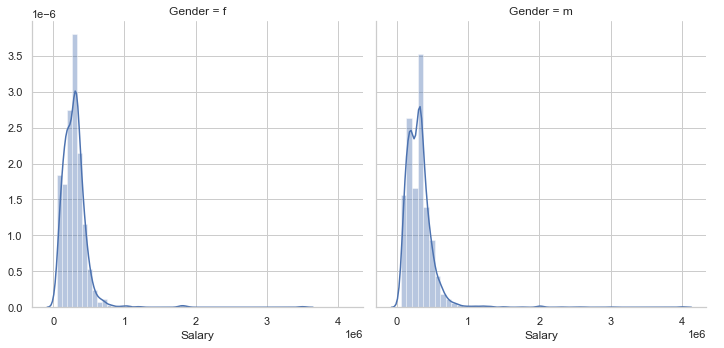

In [179]:
plt.figure(figsize=(15,5))
colors = sns.color_palette("bright",n_colors=2)
sns.FacetGrid(df, col="Gender", size=5,palette=colors) \
   .map(sns.distplot, "Salary",bins=50) \
   .add_legend()
plt.show()

* We can observe that the salary data is right skewed.
* We can also see that the distributions are quite similar for male and female in the range below 10 lakhs.

<AxesSubplot:xlabel='Gender', ylabel='count'>

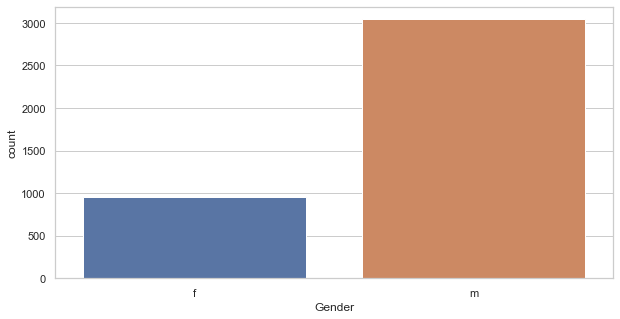

In [180]:
plt.figure(figsize=(10,5))
sns.countplot(df["Gender"])

* The ratio of m/f is 3.19 indicates there are 3 times more men than women employed

Text(0.5, 0.98, 'Salary levels by specialization')

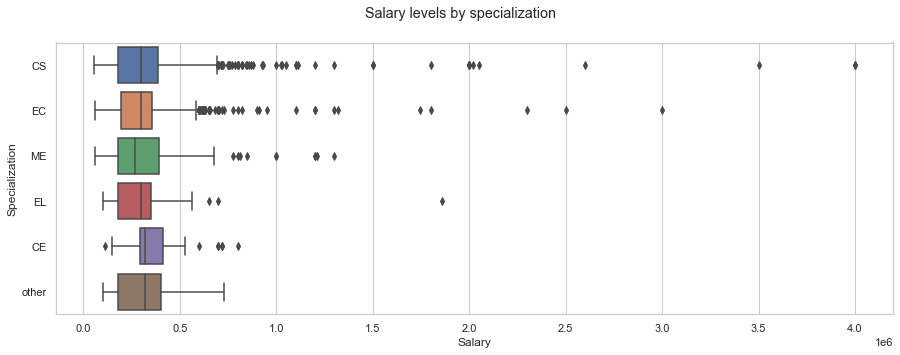

In [181]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "Salary",y = "Specialization",data = df)
plt.suptitle("Salary levels by specialization")

* Median salary of people from all specializations are nearly similar.
* We can see there are more people getting higher pays who have specialization in CS/EC compared to others.

<AxesSubplot:xlabel='Specialization', ylabel='count'>

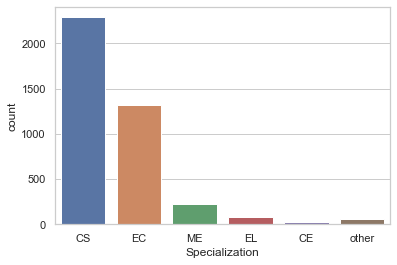

In [182]:
sns.countplot(df["Specialization"])

* Clearly their is a clear swapping amoung "CS" and "EC".

<AxesSubplot:xlabel='Degree', ylabel='count'>

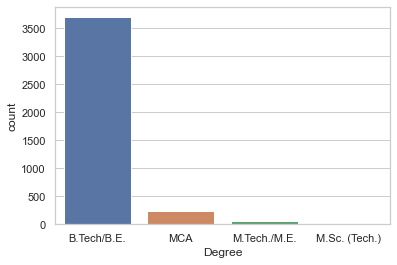

In [183]:
sns.countplot(df["Degree"])

* After Bachlor"s not many people are oppting for higher Masters degree.

In [184]:
# Designation
popular_Designation = df["Designation"].value_counts()[:20].index.tolist()
print(popular_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer', 'java software engineer', 'software test engineer', 'project engineer', 'technical support engineer', 'senior software engineer', 'java developer', 'test engineer', 'web developer', 'application developer', 'assistant manager', 'network engineer', 'data analyst', 'business analyst', 'engineer', 'android developer']


In [185]:
# We want on
top_Designations = df[df["Designation"].isin(popular_Designation)]
print(f"Unique professions : {len(df["Designation"].unique())}")
top_Designations.head()

SyntaxError: f-string: unmatched '[' (Temp/ipykernel_28876/1765934518.py, line 3)

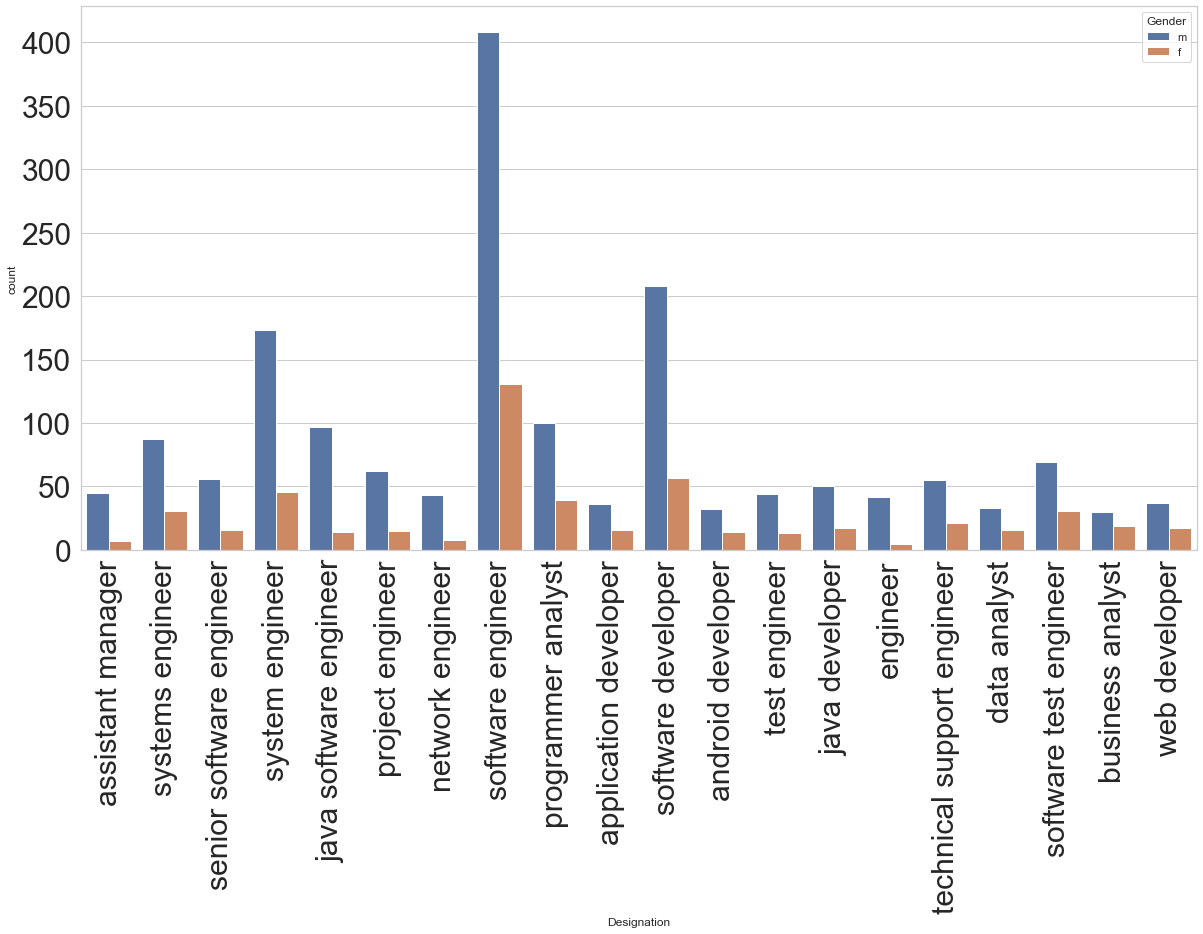

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "Designation", hue = "Gender",data = top_Designations)
plt.xticks(fontsize = 30, rotation = 90)
plt.yticks(fontsize = 30)
plt.show()

* All the general professions are more dominated by the males as we can there is considerable difference of frequency for every role.
* Here we took the most common roles taken by the amcat aspirants which are mostly "IT Roles".
* From the below plot,we can understand the reason for most "IT roles" might be because of Specialization.

<AxesSubplot:xlabel='Specialization', ylabel='count'>

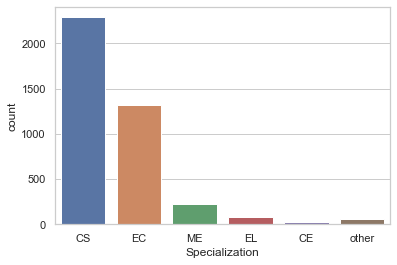

In [ ]:
sns.countplot(df["Specialization"])

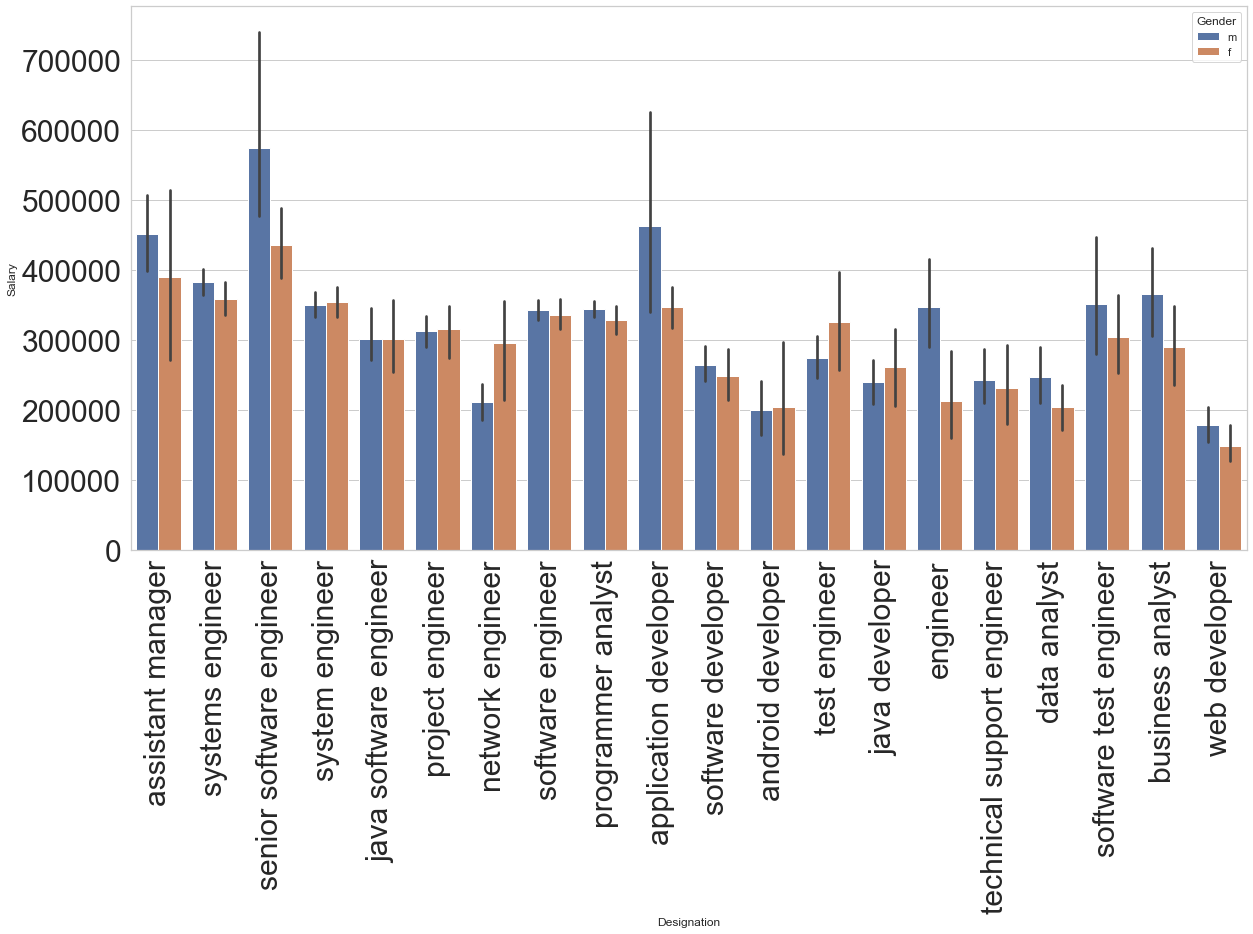

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = "Designation", y = "Salary", hue = "Gender", data = top_Designations)
plt.xticks(fontsize = 30,rotation = 90)
plt.yticks(fontsize = 30)
plt.show()

* Mean salary of top most frequent roles is nearly independent of gender.
* There is some considerable difference in some roles.but we cannot be sure that women is being paid less in that role
* It might be due to experience,specialization etc.

In [ ]:
# Now lets us see the high paying designations and their relation with respect to gender
high = list(df.sort_values("Salary", ascending = False)["Designation"].unique())[:20]
high_pay = df[df["Designation"].isin(high)]
high_pay.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,12GradAge,gyear,GradAge
3,1100000,2011-07-01,2022-09-21,senior software engineer,Gurgaon,m,1989,85.60,cbse,2007,83.60,cbse,1,B.Tech/B.E.,CS,74.64,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.4078,-0.9194,11,18,1970,19
6,300000,2014-08-01,2015-05-01,java software engineer,Bengaluru,m,1993,86.08,state,2010,67.50,state,2,B.Tech/B.E.,CS,72.98,Karnataka,1970-01-01 00:00:00.000002014,590,435,380,0.356536,405,0,346,0,0,0,0,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,1,17,1970,23
14,300000,2013-07-01,2022-09-21,java software engineer,Bengaluru,m,1992,81.20,state,2008,79.90,state,2,B.Tech/B.E.,EC,67.67,Uttar Pradesh,1970-01-01 00:00:00.000002013,395,565,645,-1.000000,495,0,376,0,0,0,0,0.7027,0.7119,0.0100,-0.9950,0.6721,9,16,1970,22
19,325000,2014-09-01,2022-09-21,software engineer,Pune,f,1990,79.00,cbse,2008,62.20,cbse,2,B.Tech/B.E.,CS,76.30,Uttar Pradesh,1970-01-01 00:00:00.000002012,485,445,435,0.864685,525,0,0,0,0,0,0,0.8192,0.2668,-0.2714,-0.4078,-0.1295,8,18,1970,20
20,320000,2010-11-01,2012-09-01,software engineer,Bengaluru,f,1988,91.20,state,2006,84.63,state,2,B.Tech/B.E.,CS,78.15,Karnataka,1970-01-01 00:00:00.000002010,455,535,445,0.635979,445,0,0,0,0,0,0,-0.1082,0.9688,0.5269,-0.2902,0.3444,2,18,1970,18


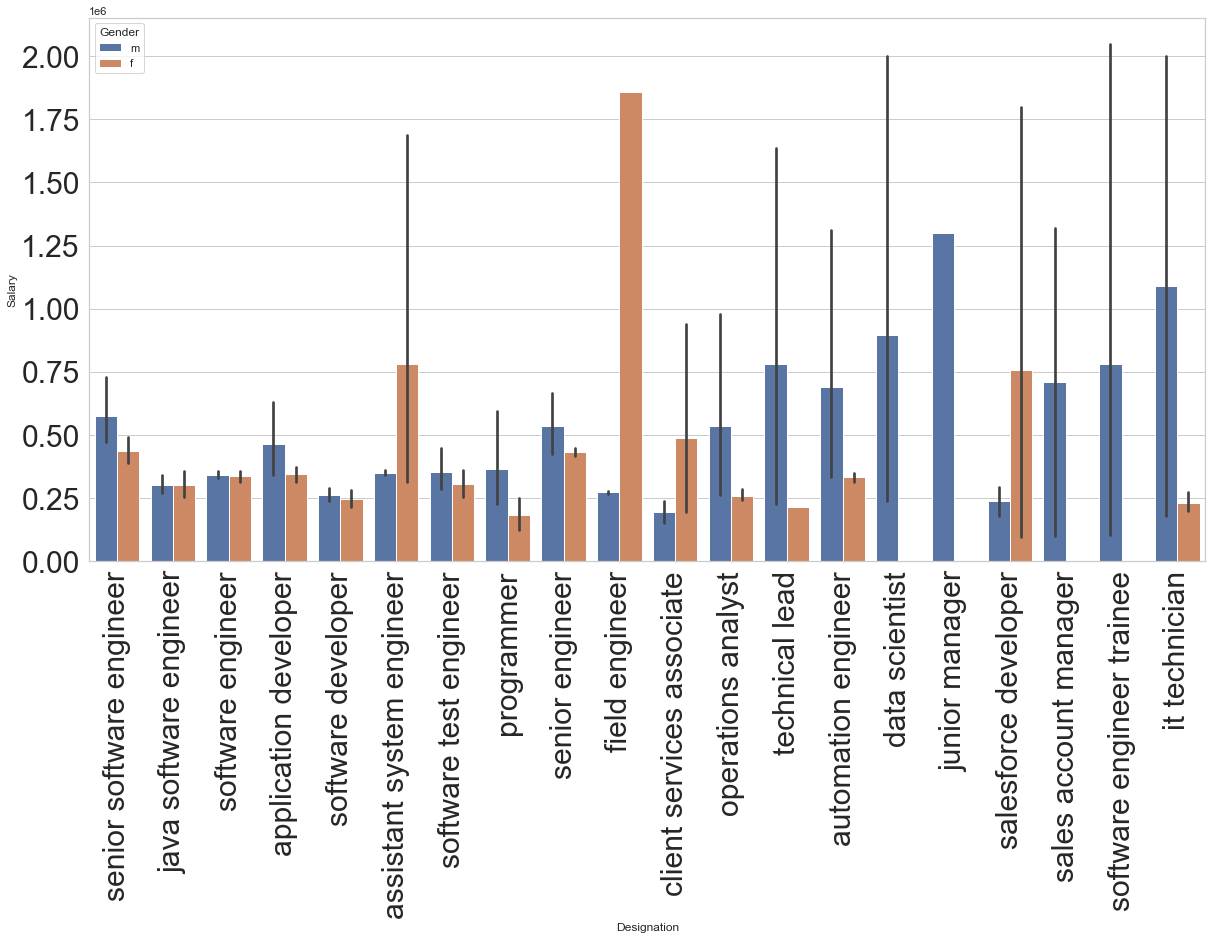

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = "Designation", y = "Salary", hue = "Gender", data = high_pay)
plt.xticks(fontsize = 30, rotation = 90) 
plt.yticks(fontsize = 30)
plt.show()

* Most of the high paying jobs are from IT domain.
* In 45% of top paying roles,men are generally paid higher compared to women.
* In 20% of top paying roles,women are paid higher than men
* In roles like junior manager,sales account manager,software engineer trainee there are no women working in these fields.
* Junior manager is highest paying for men and field engineer is the highest paying role for women.
* The disperancy between pay based on gender might be because of other features like experience,specialization etc.
* Software Enginner and Software developer are most frequent and highest paying jobs

<AxesSubplot:>

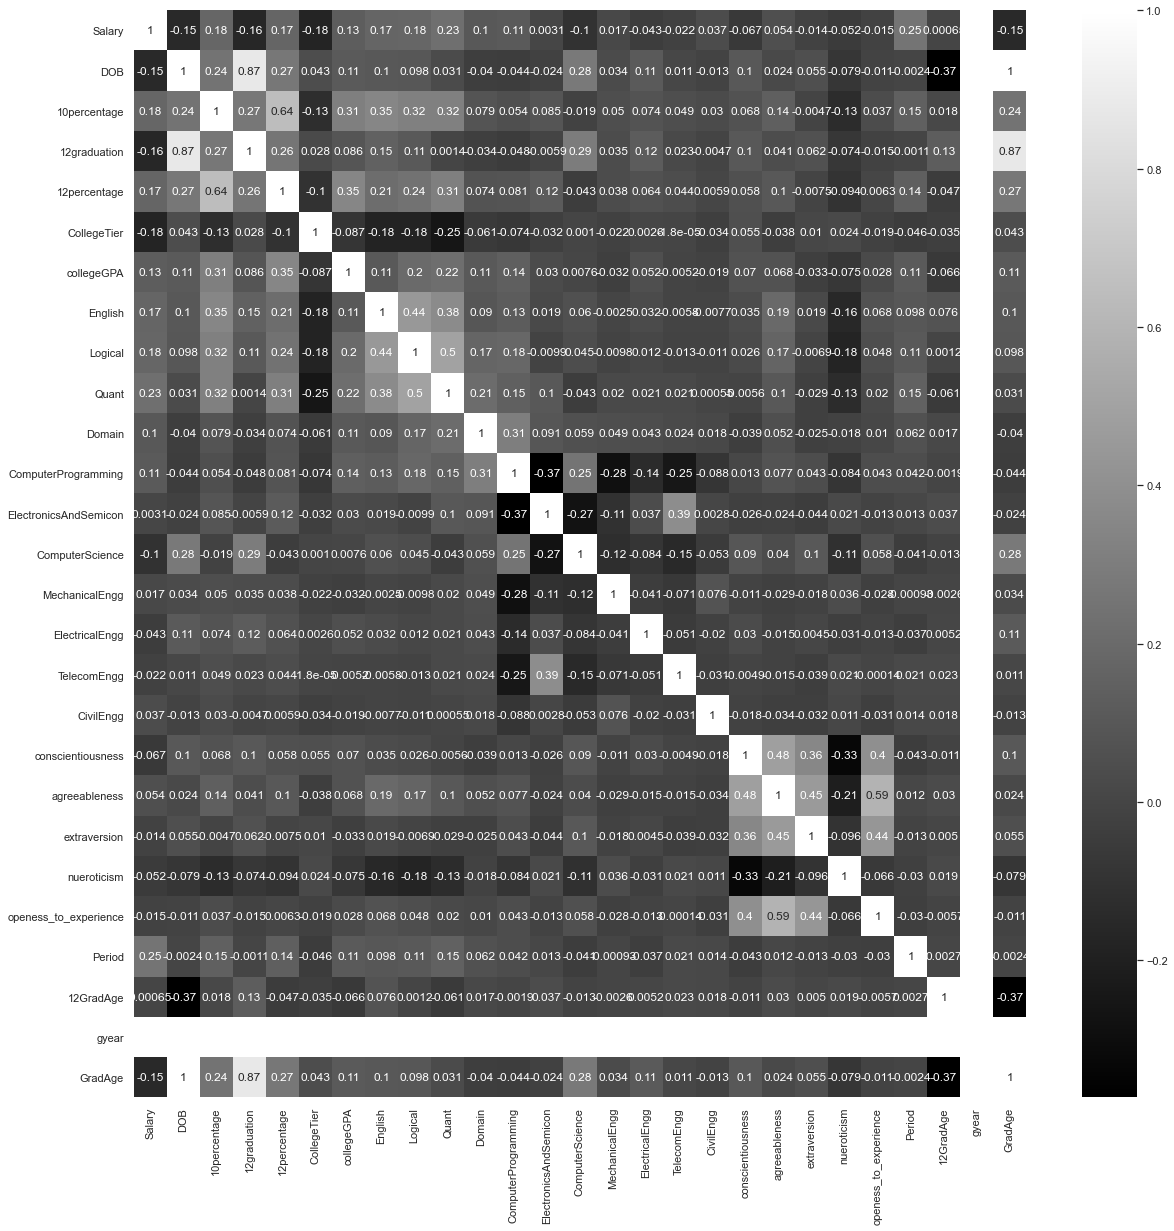

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap = "gist_gray")

For Whole dataset
Gender
f    5.539474
m    5.206721
Name: Period, dtype: float64
********************
For High_paying jobs
Gender
f    4.873563
m    4.799408
Name: Period, dtype: float64


<Figure size 1440x720 with 0 Axes>

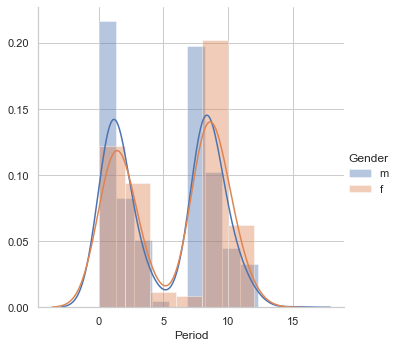

In [ ]:
# Lets us check experience distribution of both male and female
plt.figure(figsize = (20,10))

sns.FacetGrid(high_pay, hue = "Gender",size = 5) \
   .map(sns.distplot, "Period") \
   .add_legend()
print("For Whole df")
print(high_pay.groupby("Gender").Period.mean())
print("*"*20)
print("For High_paying jobs")
print(df.groupby("Gender").Period.mean())

* It is a Bi-Modal Districution
* Average Experience of male is around 5years and for women it is around 4 and half years.

<AxesSubplot:xlabel='Period', ylabel='Salary'>

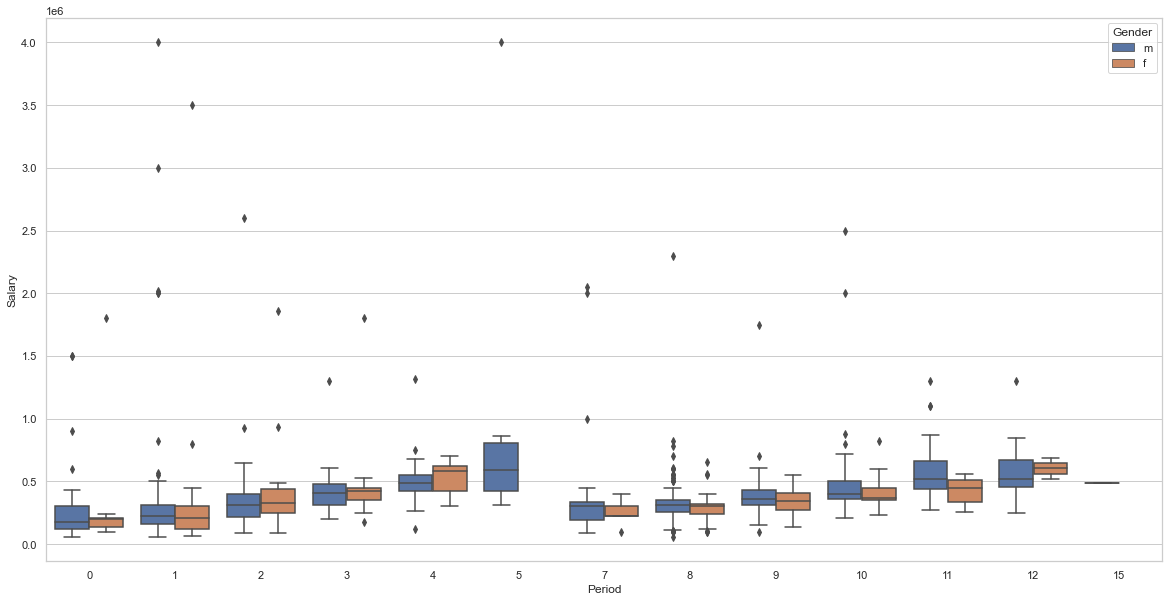

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = high_pay, x = "Period", y = "Salary", hue = "Gender")

* Median salary of both males and females have increased slightly with exp for first five years and Decreased suddenly on the 6th year and then same pattern for the following years.
* We can see that men and women having same experience are paid nearly equally around 3.5-5 lakhs
* we need to further see the distribution of experience with respect to Designation for both men and women
* to check whether women are being paid less in a role due to experience.

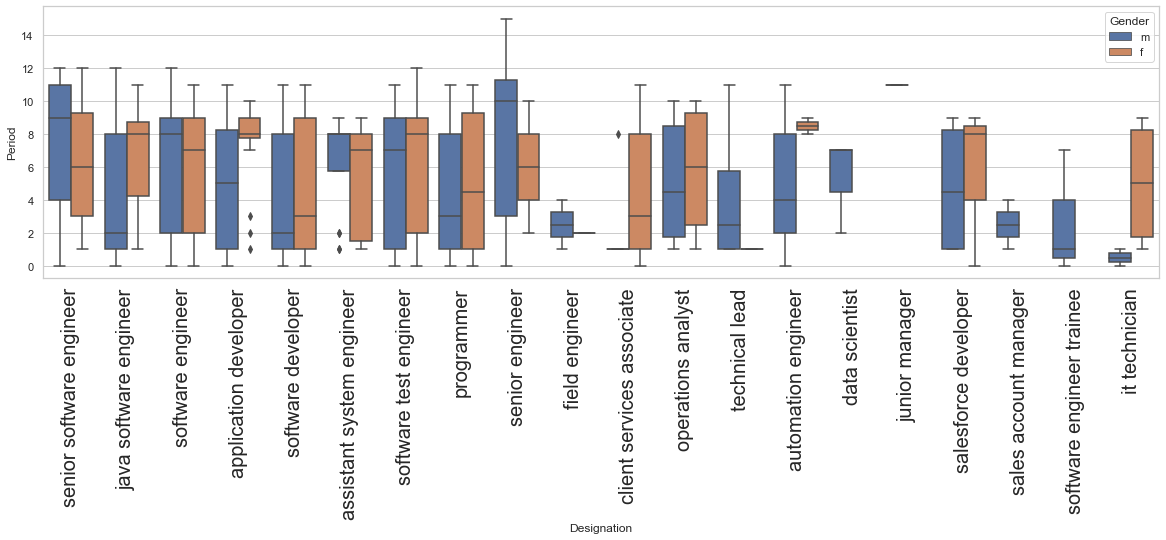

In [186]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = high_pay, x = "Designation", y = "Period", hue = "Gender")
plt.xticks(fontsize = 20, rotation = 90)
plt.show()

* The period distribution for maximum number of Designations is skewed and this tells us every designation have people with both high and low experience
* We can see there is difference in median experience of male and female in every designation.
* But it is not a strong evidence to conclude salary difference for women is due to experience because of the fact that in some roles even women having higher experience are paid less and viceversa for men.
* Also Experience has not strong correlation with salary
* Maxium experience Designation is Senior Engineer

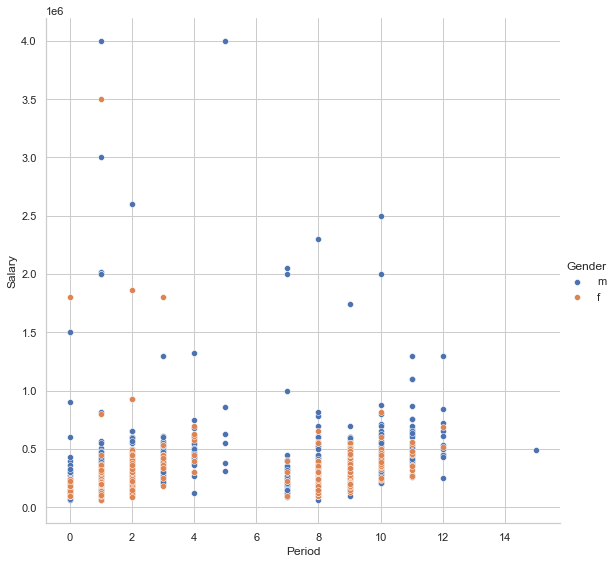

In [187]:
sns.FacetGrid(data = high_pay, hue = "Gender", size = 8) \
    .map(sns.scatterplot, "Period", "Salary") \
    .add_legend()

* For same amount of experience,men are paid slightly higher than women in most of the cases.
* Mostly men have highly paid jobs compared with women for every level of experience.

In [188]:
# What is average experience of software engineer and software developer?
df[df.Designation.isin(["software engineer","software developer"]) & df.Gender == "m"]["Period"].mean()

nan

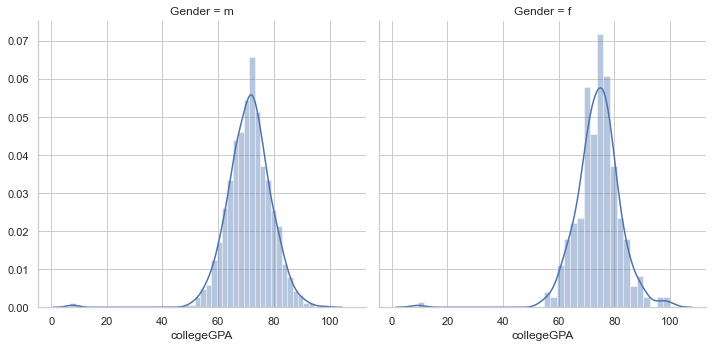

In [189]:
# Now let us check relation with collegegpa
# first check the distribution of gpa 
sns.FacetGrid(data = high_pay, col = "Gender",size = 5) \
    .map(sns.distplot,"collegeGPA") \
    .add_legend()

* We can see how Similar both male and female distributions are for collegeGPA
* IQR is narrow indication most number of students have similar cgpa in 70-75% region.
* There are some students with CGPA < 20 and CGPA>90

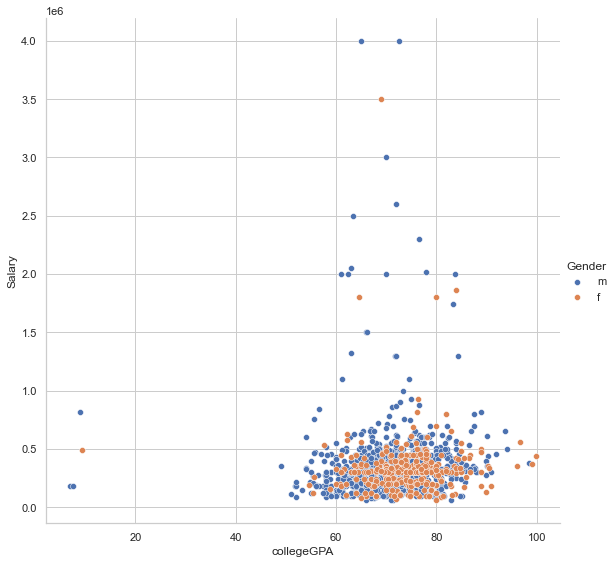

In [190]:
sns.FacetGrid(data = high_pay, hue = "Gender", size = 8) \
    .map(sns.scatterplot, "collegeGPA", "Salary") \
    .add_legend()

* Most of men and women have cgpa around 70-75 which is a good range.
* There is no relation that having high or low gpa being men/women is effecting the salary
* so we can conclude this is not the reason for women being paid less as both distributions overlap extensively.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

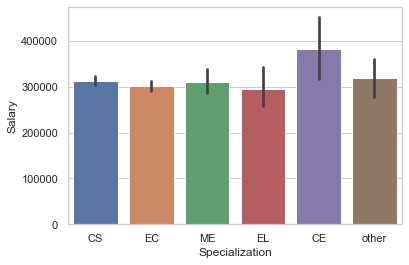

In [191]:
sns.barplot(data = df, x = "Specialization", y = "Salary")

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

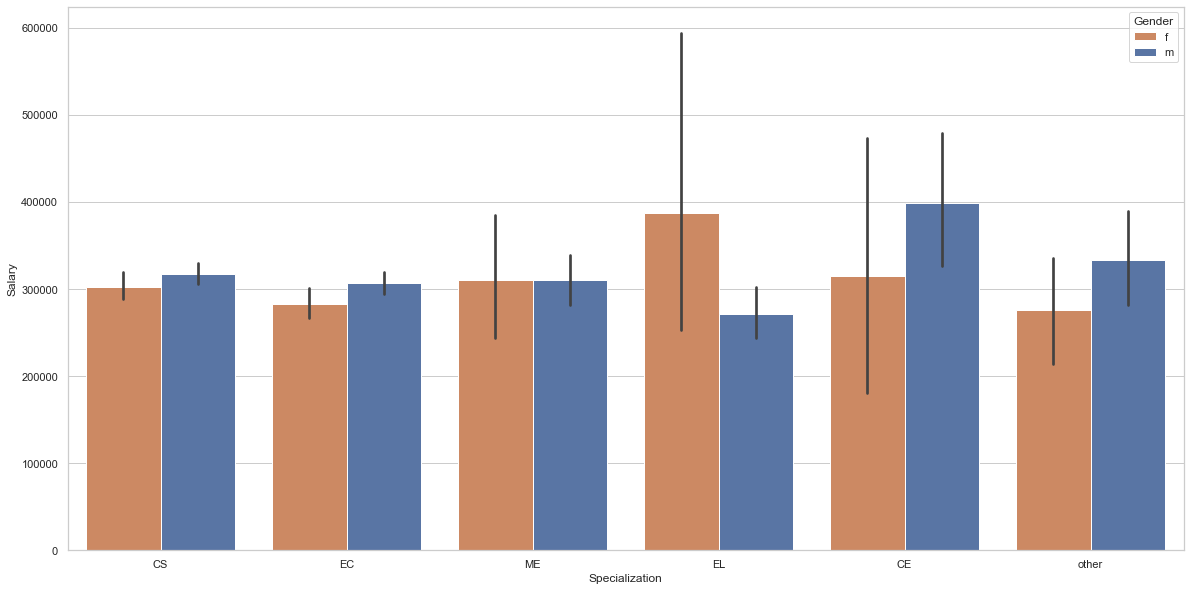

In [192]:
# For the total df
# Checking whether specialization has any effect on salary
plt.figure(figsize = (20, 10))
palette = [(0.8666666666666667, 0.5176470588235295, 0.3215686274509804),(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]
sns.barplot(data = df, x = "Specialization", y = "Salary", hue="Gender", palette = palette)

* Men from CS,EC,CE Earn slightly greater than women from this specialization.
* Women from the EL specialization Earns way more than men from same specialization.

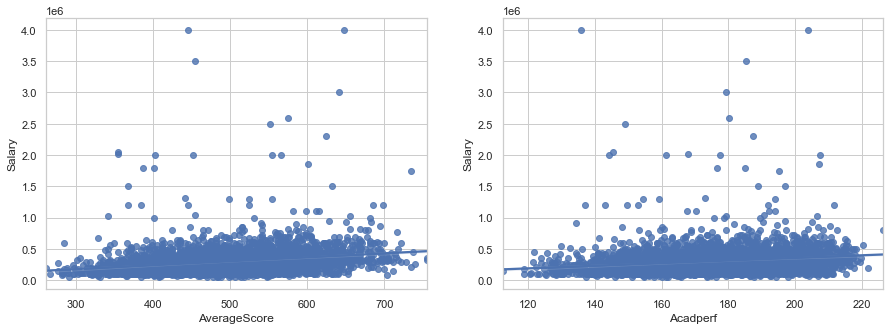

In [193]:
plt.figure(figsize=(15,5))
df["AverageScore"]=(df["Logical"]+df["Quant"]+df["English"])/3
df["Acadperf"]=df["10percentage"]+df["12percentage"]+df["collegeGPA"]/3
plt.subplot(1,2,1)
sns.regplot(x="AverageScore",y="Salary",data=df)
plt.subplot(1,2,2)
sns.regplot(x="Acadperf",y="Salary",data=df)
plt.show()

* We can see there is some positive correlation of salary with both the Avgscore and Acadperformance.

In [194]:
popular_cities = high_pay["JobCity"].value_counts()[:15].index.tolist()
top_Destination = high_pay[high_pay["JobCity"].isin(popular_cities)]

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

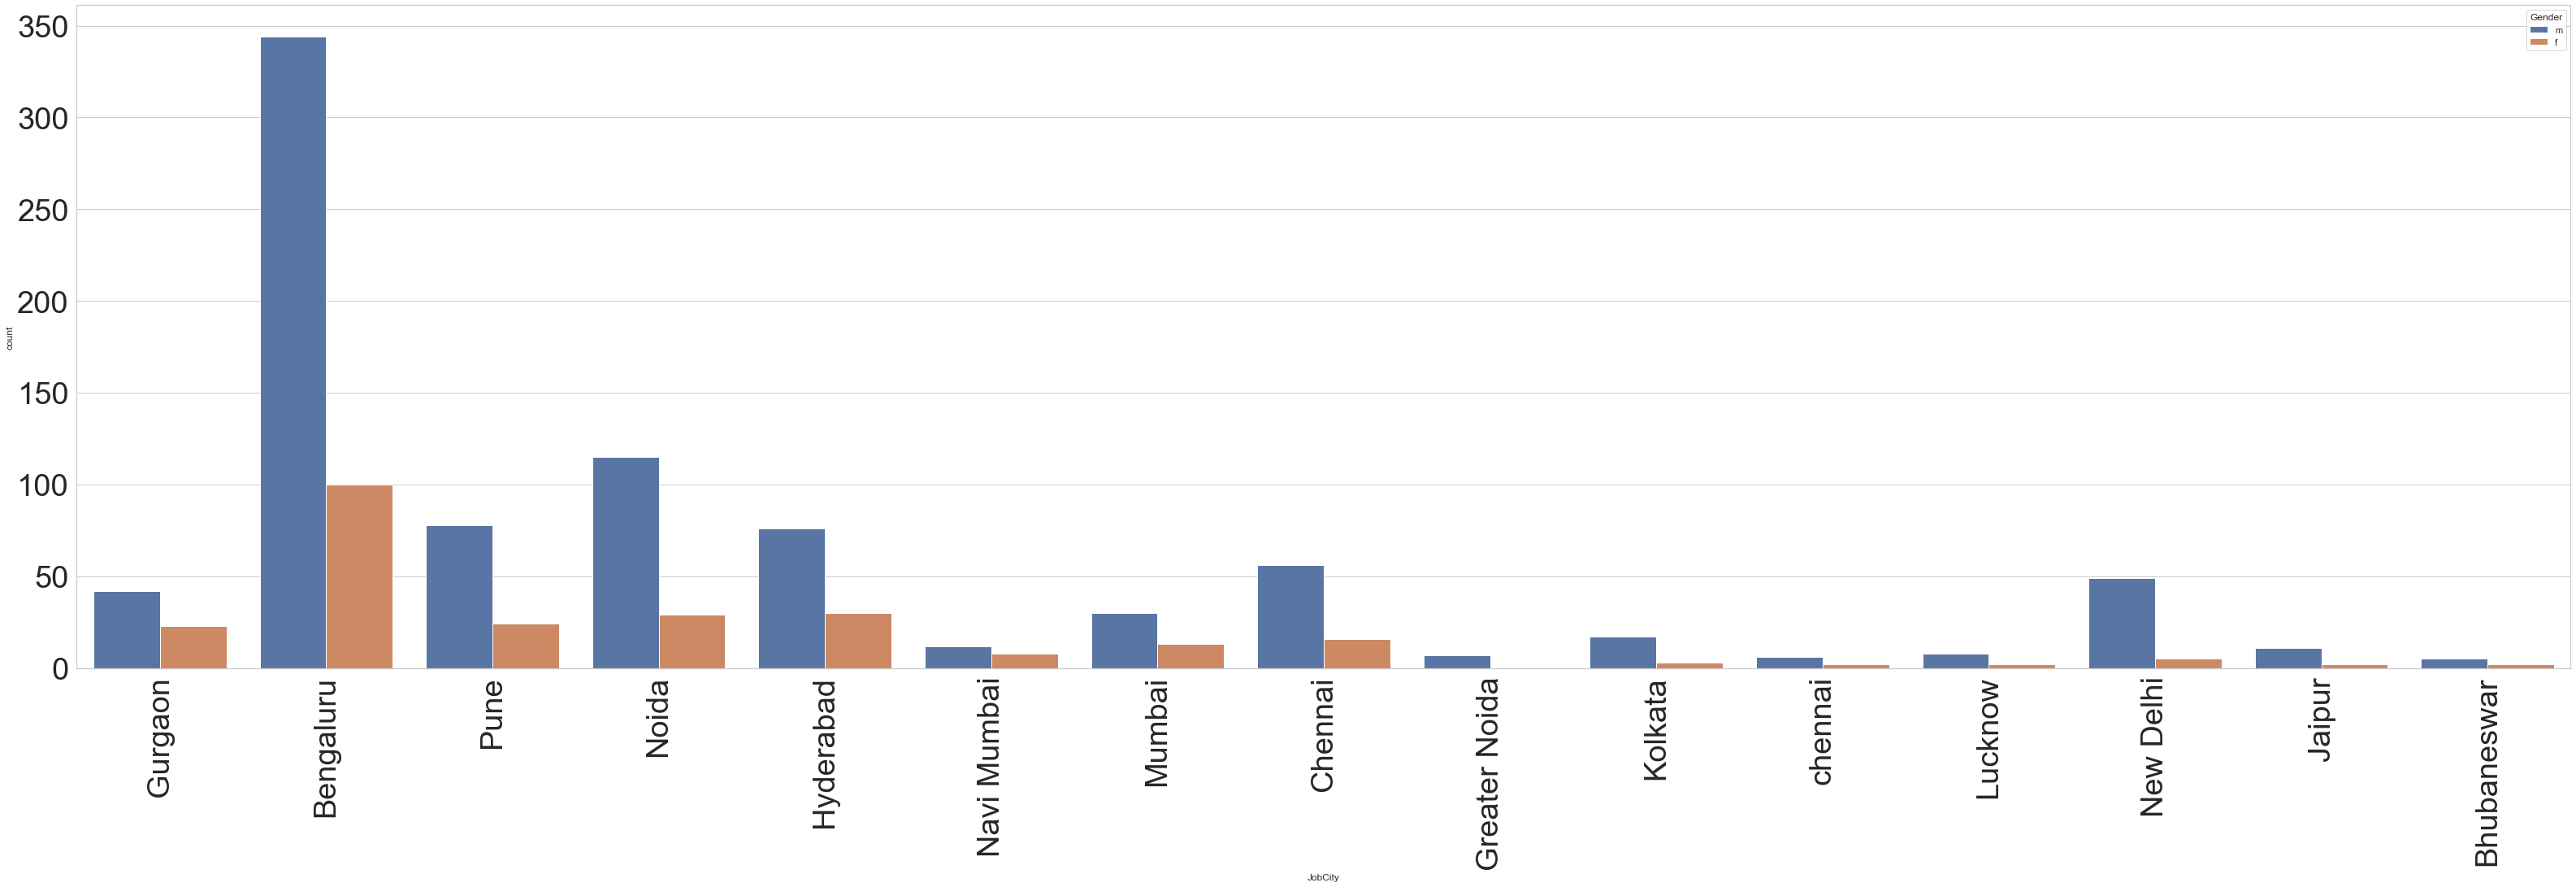

In [195]:
plt.figure(figsize = (55, 15))
sns.countplot(x = "JobCity", data = top_Destination, hue = "Gender")
plt.xticks(fontsize = 38,rotation = 90)
plt.yticks(fontsize = 38)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

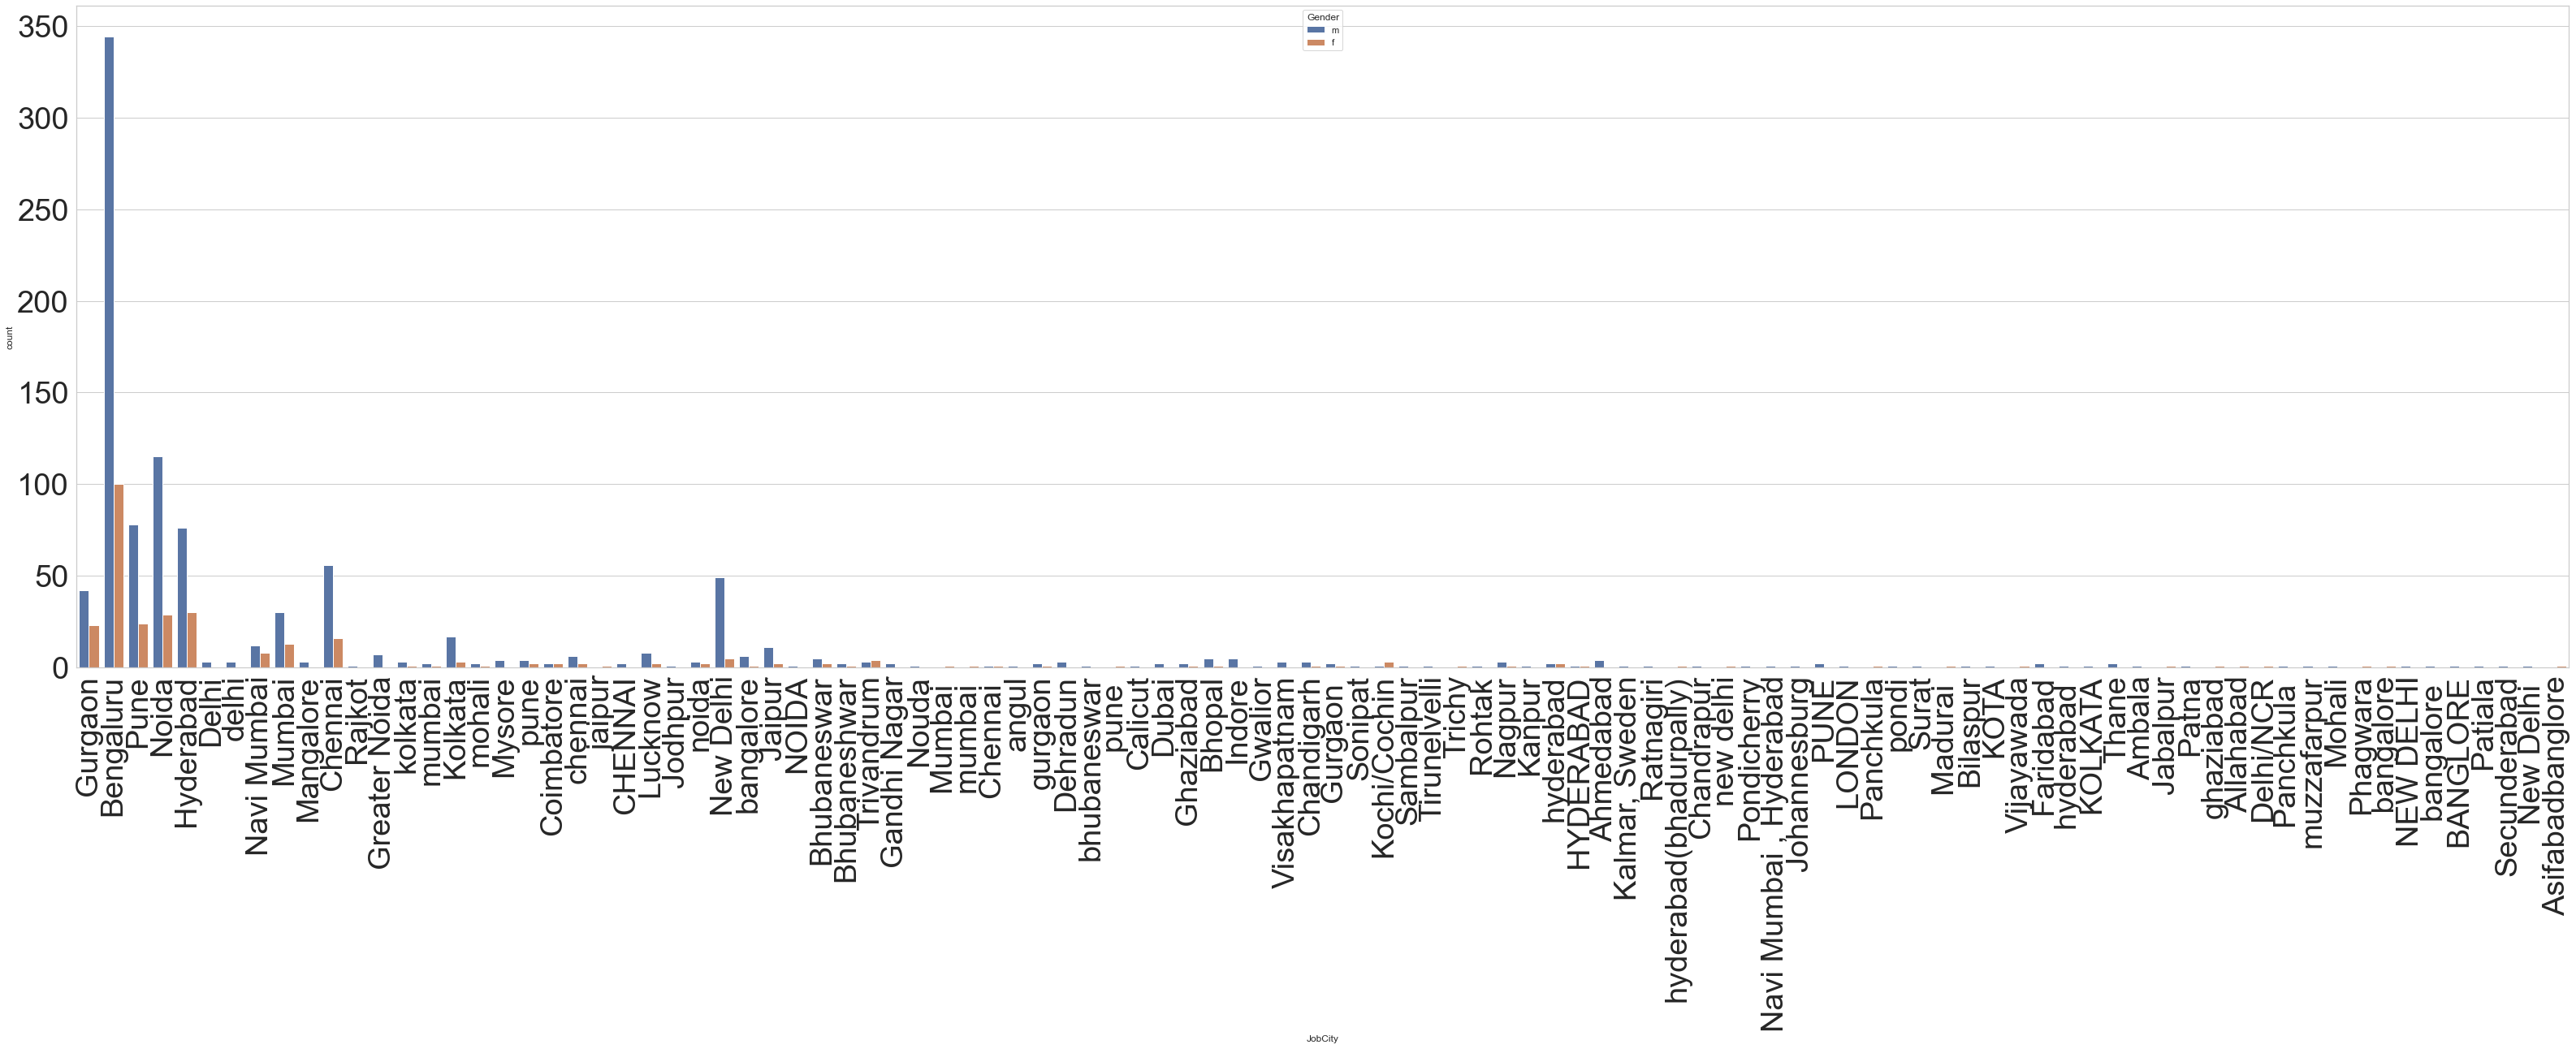

In [196]:
plt.figure(figsize = (55, 15))
sns.countplot(x = "JobCity", data = high_pay, hue = "Gender")
plt.xticks(fontsize = 38, rotation = 90)
plt.yticks(fontsize = 38)

* Most amcat aspirants work in bengaluru,Noida,hyderabad and pune.
* It is because most of them are from IT domain so majority of them work in these cities

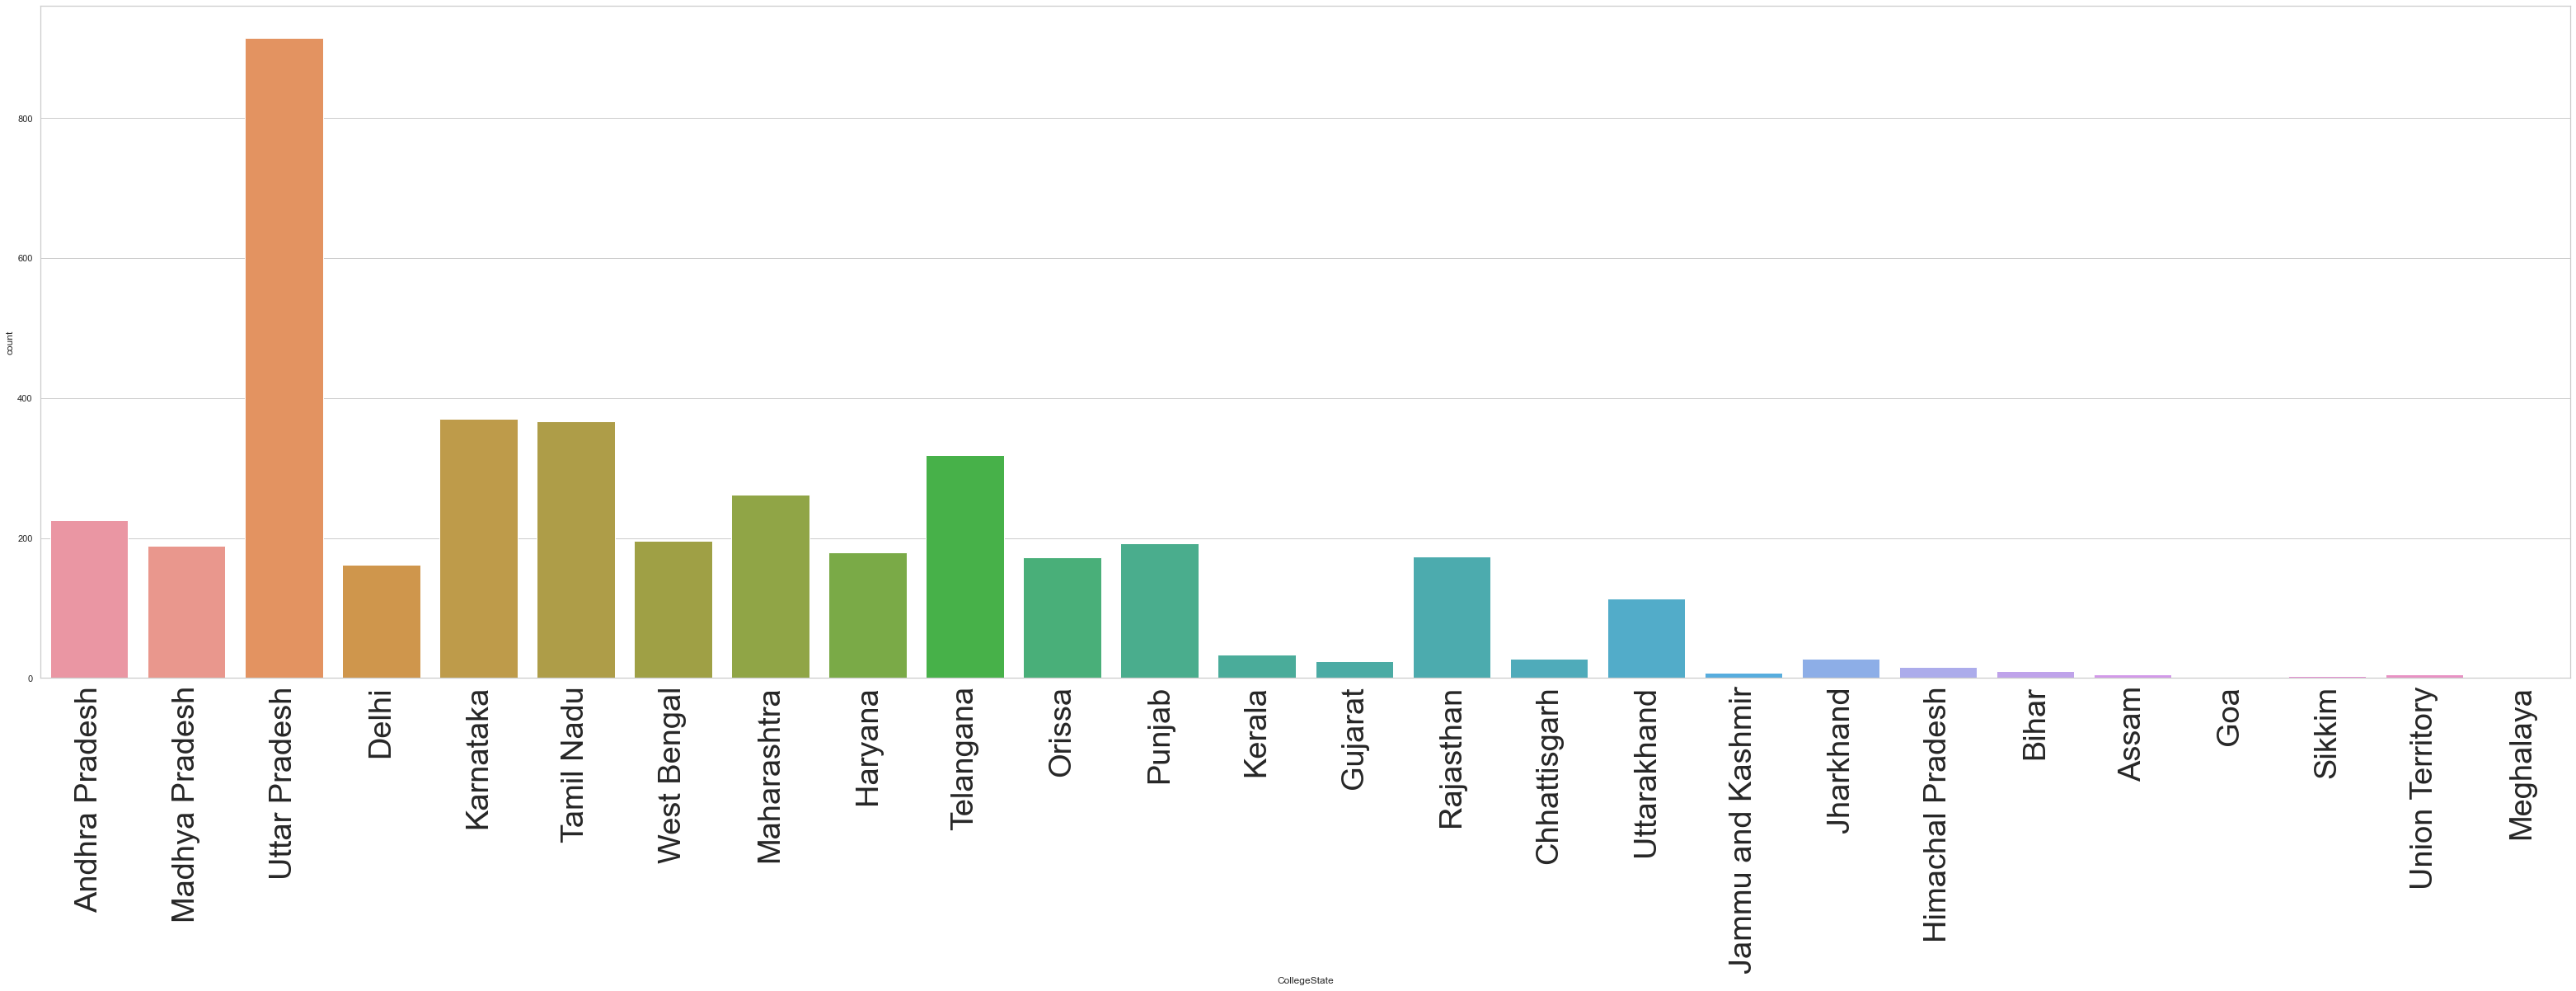

In [197]:
plt.figure(figsize = (55, 15))
sns.countplot(data = df, x = "CollegeState")
plt.xticks(fontsize = 38, rotation = 90)
plt.show()

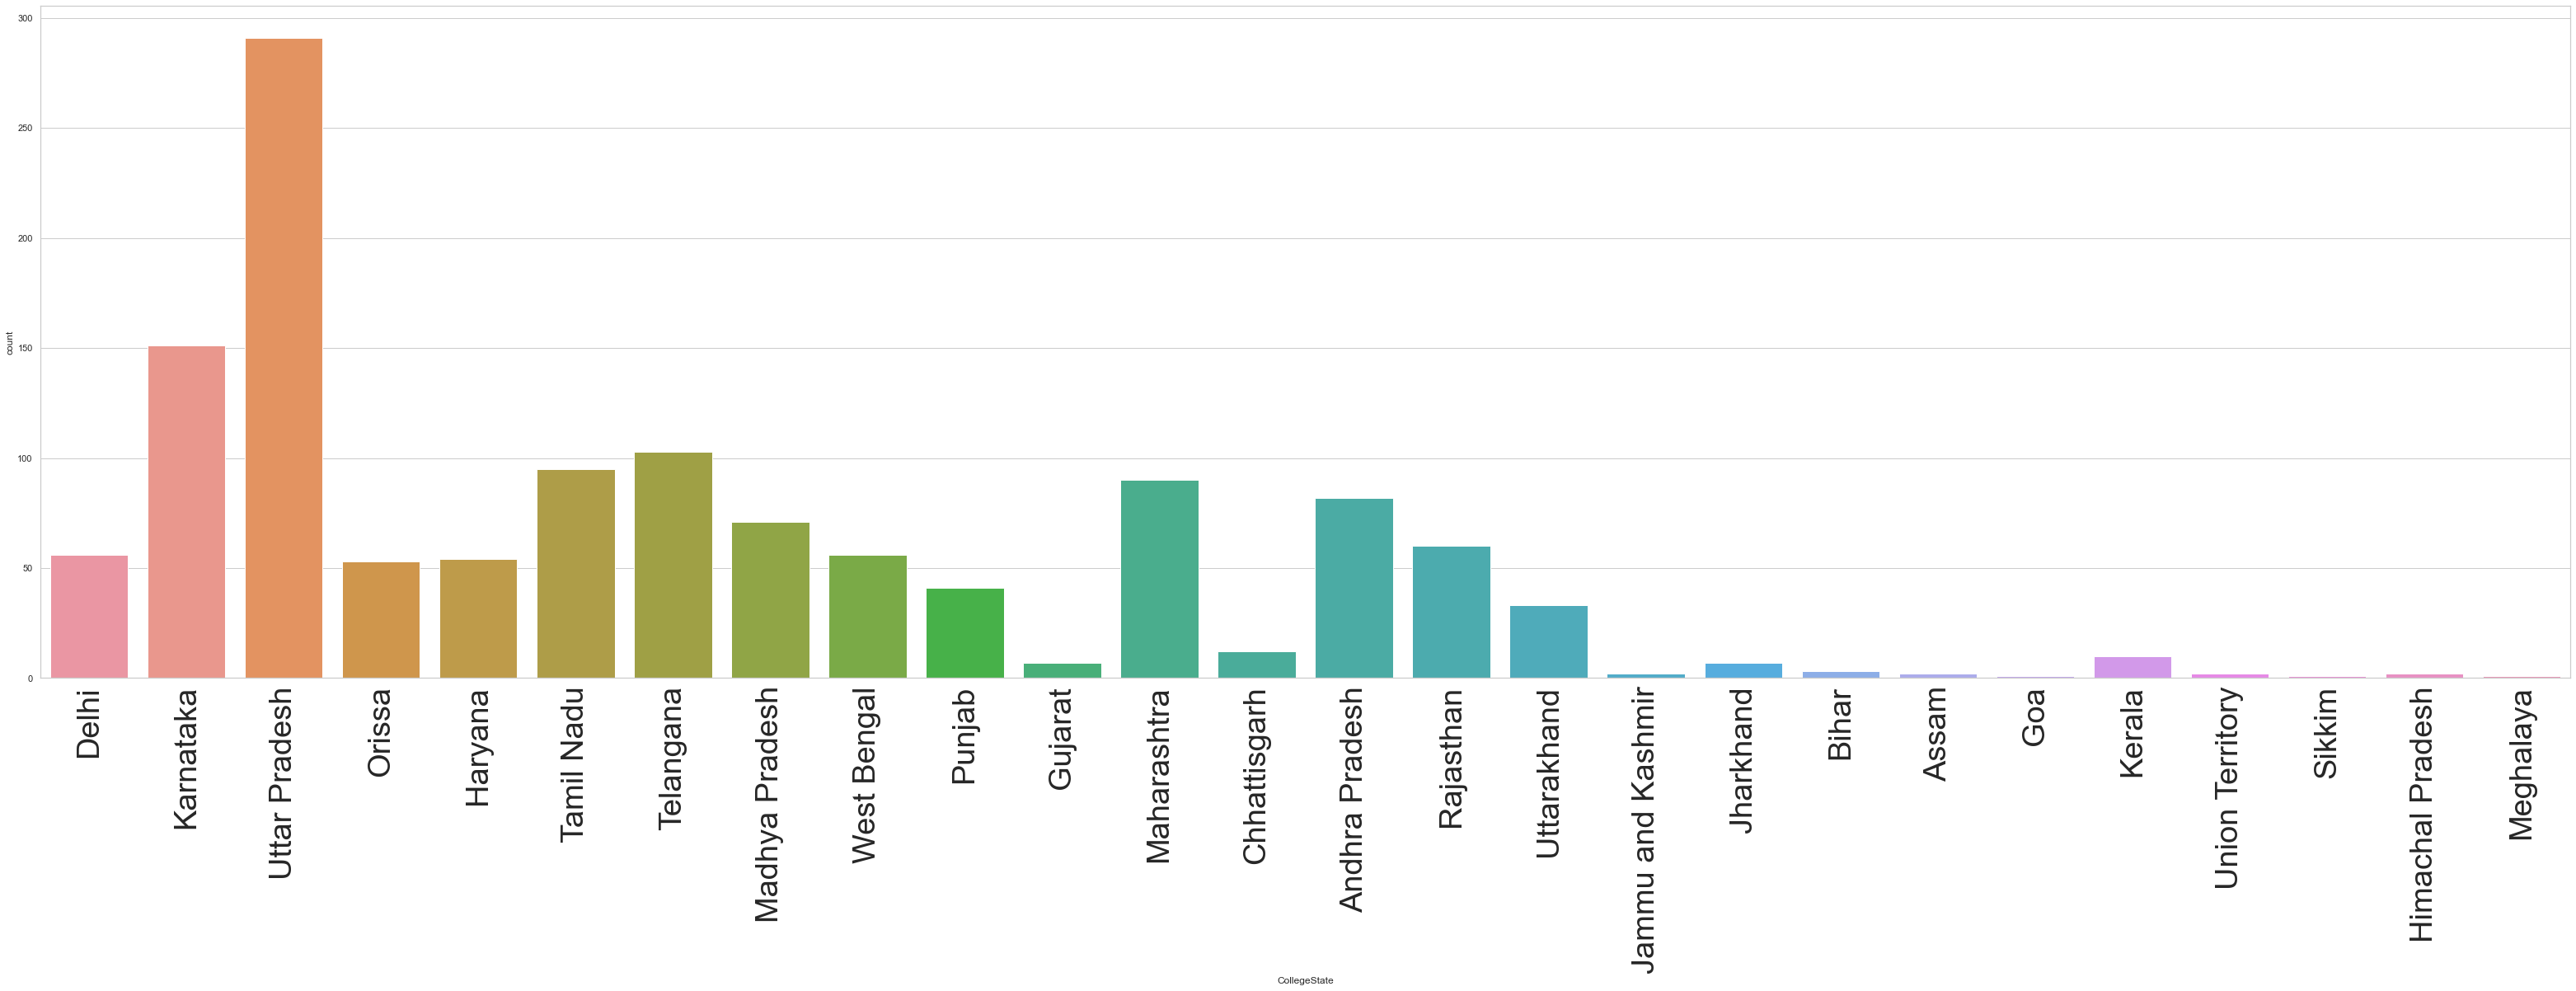

In [198]:
plt.figure(figsize = (55, 15))
sns.countplot(data = high_pay, x = "CollegeState")
plt.xticks(fontsize = 38, rotation = 90)
plt.show()

## Overall Conclusions:
### 1. Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in Btech and specialization in Computer Science/Information Technology from tier-2 college in uttarpradesh with an average salary around 300k.  
### 2. Highpaying jobs taken up by amcat aspirants are mostly from "IT" Domain.
### 3. Software Engineer and Software Developer are the most aimed profession for amcat aspirants.

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

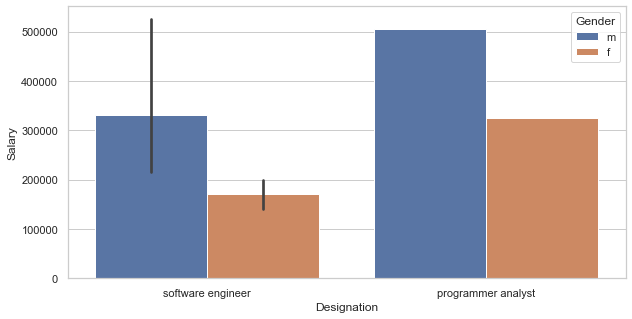

In [199]:
new = df[(df["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df["Period"]==0)]
plt.figure(figsize=(10,5))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=new)

* For Freshers,the salary is starting from 200k and male are earing more than female as a fresher.

## Let us do a 1 sample T-test to verify the claim

* Null Hypothesis: mu = 250k
* Alternate Hypothesis : mu != 250k

In [200]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pv = st.ttest_1samp(new["Salary"], popmean = 250000)[1]
# For a 95% confidence interval,my p- value should be >0.05 to claim the null hypothesis
if pv < 0.05:
    print("We reject the null hypothesis and Average salary is not equal to 250k")
else:
    print("We fail to reject null hypothesis and Avergae salary is equal to 250k")

We fail to reject null hypothesis and Avergae salary is equal to 250k


<AxesSubplot:xlabel='Specialization', ylabel='count'>

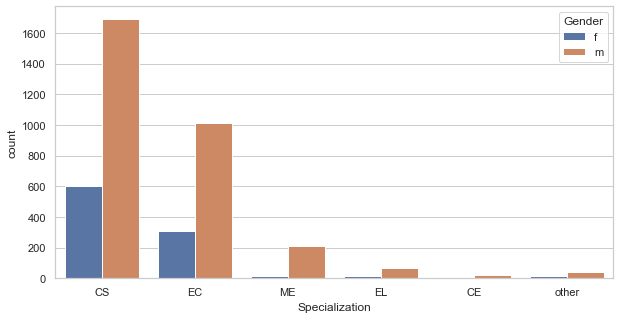

In [201]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = "Specialization", hue = "Gender")

* Most of the Amcat Aspirants are from CS&EC specialization.
## Let us do a Chi-Square Test to check the relation between Specialization and Gender.

* Null Hypothesis:  Gender does not impact specialization
* Alternate Hypothesis : Gender impacts specialization

In [202]:
sample_columns = pd.crosstab(df["Gender"], df["Specialization"], margins = True)
pv = cst(sample_columns)[1]
if pv < 0.05:
    print("We reject the null hypothesis and Gender impacts specialization")
else:
    print("We fail to reject null hypothesis and Gender does not impact specialization")

We reject the null hypothesis and Gender impacts specialization


## So,The above made claims are True!

In [ ]:
### Saving my cleaned dataset
df.to_csv("D:\Python\Data Set\Aspiring\\Aspiring_cleaned.csv", index = False)